# Project 2

Statistics and graphs presented will be calculated based on the training data (representing 70% of the full dataset) unless otherwise stated.

## Imports

In [276]:
%matplotlib inline
from IPython.display import Image
from IPython.core.display import display

## Historical data

### Structures in the data

#### Overview of the data

First let us look at the simple distribution of the two symptoms. This shows the frequency of the two symptoms in the entire dataset. From the histogram it could seem like symptom 2 is less frequent than symptom 1.

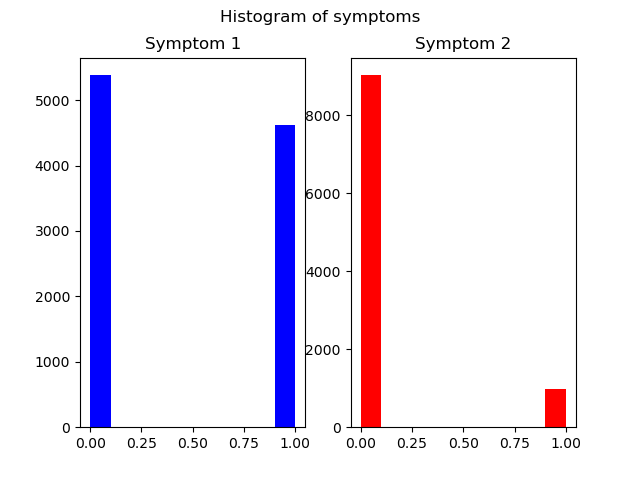

In [3]:
display(Image(filename="img/freq_hist.png", width = 600))

In [237]:
x.mean().sort_values()

symptom 2    0.0973
smoker       0.2722
symptom 1    0.4619
gene 20      0.4852
gene 102     0.4884
              ...  
gene 79      0.5098
gene 87      0.5108
gene 73      0.5108
gene 47      0.5127
gene 126     0.5781
Length: 130, dtype: float64

Further, looking at the the presence of covariates we see that ca. 27% are smokers, and that almost all the genes are represented in about half the population. We do not know if our data is a representative sample from the population in the country where this data was generated. Therefore, the genetic data in particular might not be representative, as certain genes can cluster geographically and socioeceonomically. Depending on when the the data was gathered there might also be an overrepresentation of smokers, as the smoking population has declined to 14% in recent times in the US. https://www.cdc.gov/tobacco/data_statistics/fact_sheets/adult_data/cig_smoking/index.htm

#### Single cause versus multiple cause model

We do not know how many diseases are present, and if they are caused by a single covariate or multiple covariates. To investigate this we will fit single covariate and multiple covariate models, and make use of clustering. A major weakness of single cause models is that they do not take into account higher order interactions between the covariates, which a multiple cause model can capture. However, if there is a lot of noise in the data then a single cause model can be expected to perform well. Multiple cause models also have a greater chance of overfitting the data as they have less bias than single cause models.

By looking at the simple histogram of frequencies we see that the distribution of the two symptoms are very different. Symptom 2 seems to be far less frequent than symptom 1. In order to look further into into unknown clusters in the data, we could use unsupervised learning techniques such as K-means clustering or hierarchical clustering. Our overall goal is to predict the symptoms based on the covariates which are gender, smoker and gene expression data. Because of the number of covariates (the number of different gene expressions), it is not trivial to examine if there is a single cause (covariate) for the symptoms or not.

There could also be a subset of gene expression that are the main cause of the symptoms, but determining which of the gene expression that explains the most of the variability in the symptoms could be more difficult to infer. This is closely related to the concept of confounding covariates. Two covariates, if correlated, could be subject to confounding in such a way that the effect of the second covariate could be partly expressed through the first covariate. In the case of two covariates, the second is then affecting through $\hat{\rho} \sqrt{\frac{\sigma_{1}}{\sigma_{2}}}$ where $\hat{\rho}$ is the correlation between the covariates, $\sigma_i$ is the standard deviation of the covariate $i$ (Borgan, 2019, p. 1). In our case this risk is particularly pronounced, as it is well known that genes affect the risk of certain behaviours (like smoking). Some genes could also be confounded by other genes, masking their influence on the response variable.

By attempting to narrow down the covariates that cause a particular symptom, we are looking at a "causes of effect" problem (Dawid, 2015, p. 5). That is, what covariates causes the symptoms observed in the data set. When it comes to data sets that we observe after the "experiment" has taken place (that is, collecting the data) there should ideally be exchangeability among the observations (Dawid, 2015, p. 21). This condition may be difficult to verify when looking at the dataset, especially when taking into account the uncertainty that (may) be involved when registering data for the symptoms. These could range from objective measurese such as a level of concentration or to more subjective measures such as an individual assessment of symptoms.

Further, Dawid also discusses the negative impact of confounding when observing the data. In order to achieve this, there must in principal be exchangeability between groups within the data. He then considers the case of having the treated groups being exchangeable with the non-treated group in order to have exchangeability and that this in theory happens when the observations are randomised (Dawid, 2015, pp. 21-22). Dawid then relates the absence of confounding to independence between the covariates (Dawid, 2015, p. 22). This can also be considered when looking at the definition from Borgan above, where confounding is expressed through correlation $\hat{\rho}$ between the covariates.

##### K-means and K-modes clustering

The idea behind K-means and K-modes clustering is to find the clusters that minimize the variation within each of the K clusters. For K-means, this variation can be measured using a distance metric such as the squared euclidean distance between the covariates (denoted by $C$) of the two observations

$$
\sum_{j=1}^{C} (x_{ij} - x_{i'j})^{2}
$$

adapted from (James et al., 2013, p. 387). Euclidean distance translates poorly to our use case in which all our covariates are binary categorical variables. In this case, K-modes clustering (Huang, Z. 1998) seems the more promising method. The distance metric used in this case is defined as $$d(X, Y) = \sum_{i=1}^{n}\delta(x_i, y_i)$$ where $\delta(x_i, y_i) = 0$ if $(x_i=y_i)$ and $\delta(x_i, y_i) = 1$ if $(x_i\neq y_i)$. Using this, the we desire to minimes the function $$P(W, Q) = \sum_{l=1}^{k}\sum_{i=1}^{n}\sum_{j=1}^{m}\omega_{i,l}\delta(x_{i,j},q_{l,j})
$$ So as to find the "optimal" clusters, where W is a partition of the dataset and $Q$ is the set of cluster vectors. This function is minimised by allocating observations to the cluster whose mode is nearest to it in terms of our distance metric. We update the mode after each allocation. After all the observations have been allocated we recheck the distance between all the observations and the clusters. We repeat this process until no observation changes cluster.

In this example, we could use this algorithm with $K=2$ and check the clusters created by the algorithm with the different symptoms. Intuitively, if a large percentage of the cluster 1 observations exhibit one of the symptoms compared to those observations in cluster 2 it could be reason to investigate closer if there in fact are two different clusters of observations, each mainly related to each of the symptoms. 

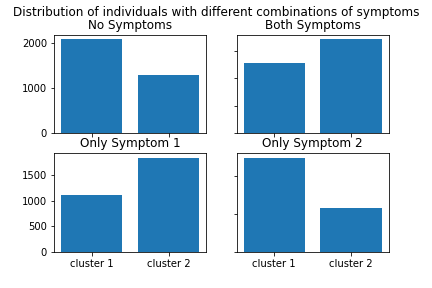

In [284]:
display(Image(filename="./clustering.png", width = 600))

We see interesting results from our clustering. We look at the distribtuion of four cases between the clusters, that of the asymptomatic, those with only symptom 1, those with  only symptom 2,those with  both symptoms. We observe that there is representation in both clusters of all four cases. However, symptom 1 skews towards cluster 2 while symptom 2 skews towards cluster 1 at about a 2:1 ratio. The skewness in the symptoms suggest that there are diseases in the population which tend to cause one symptom and not the other. The fact that there is substantial representation in both clusters in all the four cases suggests that there are also diseases present in our population which cause neither symptom and both symptoms respectively. However, the skewedness in the asymptomatic and both symptom cases might be a result of the fact that there is an overrepresentation of symptom 2 in the former and symptom 1 in the latter rather than the presence of additional disease classes.

##### Logistic regression

Let us now look at logistic regression as a model for the data. We shall first fit a full model on the data and then check which of the regression parameters are significant at the 0.05 level. We regress all the non-symptom covariates on symptom 1 and symptom 2 respectively.

In [274]:
print("Significant parameters for a regression on Symptom 1: ", s_1_significant_params_05)
print("Significant parameters for a regression on Symptom 2: ", s_2_significant_params_05)
intersection_05 = set.intersection(set(s_1_significant_params_05), set(s_2_significant_params_05))
print("Significant parameters for both models: ", intersection_05)

Significant parameters for a regression on Symptom 1:  ['gene 2', 'gene 3', 'gene 4', 'gene 25', 'gene 34', 'gene 51', 'gene 53', 'gene 60', 'gene 69', 'gene 74', 'gene 78', 'gene 82', 'gene 89', 'gene 99', 'gene 100', 'gene 119', 'gene 120', 'gene 125']
Significant parameters for a regression on Symptom 2:  ['smoker', 'gene 2', 'gene 3', 'gene 5', 'gene 8', 'gene 13', 'gene 42', 'gene 44', 'gene 45', 'gene 47', 'gene 56', 'gene 57', 'gene 60', 'gene 76', 'gene 80', 'gene 97', 'gene 99', 'gene 104']
Significant parameters for both models:  {'gene 60', 'gene 2', 'gene 99', 'gene 3'}


We see in both models that there are multiple significant factors at the 0.05 level.  Additionally, there is an overlap between the models of genes that are significant for both symptoms. This suggests a multiple cause model. Our results suggest that genes 2, 3, 60, and 99 are important for disease epidemiology, as they are significant in both models. Further study of these genes is warranted based on the results of this model. However, considering the issues with p-values outlined in Dimitrakakis p. 53, which includes the fact that they only measure the fit on the data, we will corroborate these findings with other methods.

Ideally we would like to fit a model on every subset of covariates and directly compare them so as to determine the best model in terms of predictive accuracy. This predictive accuracy could be determined using cross-validation on a valdiation set (within the training data), and on this basis we could select the covariates that make up the "best" model. In that way, we could say that it is more likely that there is a single-cause model if the best model w.r.t. prediction is a model with a single covariate. On the other hand, if the number of "optimally" chosen covariates are $>1$ then this could imply that there is in fact a multiple-cause model that is more likely. It would also be possible to use different forms of information criterias in order to perform variable selection, such as AIC or BIC. This would have penalized the number of covariates directly to avoid overfitting. However, due to the large number of covariates, testing all possible models would mean comparing $2^{130}$ models, an intractable number. Therefore, we shall consider only a subset of the possible models. 

In order to check the effect of the different covariates, we used recursive feature elimination with cross-validation in order to select the covariates based on the misclassification score (scikit learn, 2020). This is then specified to use a stratified K-fold cross-validation (because of the few occurences of symptom 2). What is interesting is the fact that for both symptoms, the variable selection selects one covariate for each symptom, 'gene 4' for symptom 1 and 'gene 3' for symptom 2 based on 3-fold cross-validation on the training data of the dataset. Looking at the accuracy score for the logistic regression of the two symptoms.  contrary to the earlier recursive feature elimination results. It is interesting to note that the single factors chosen by the recursive feature eliminations are present in those that are significant in the full model.

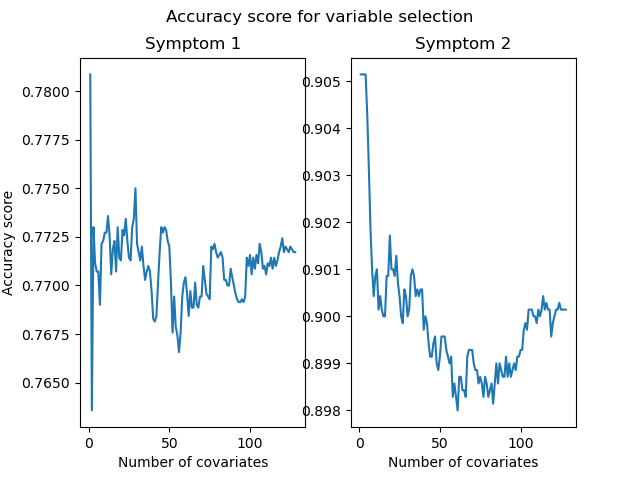

In [4]:
display(Image(filename="img/var_sel.png", width = 600))

##### Hierarchical model

Now let us observe the problem of a single vs multiple cause model from the Bayesian perspective. The relationship we are interested in is given by $y_t | a_t$, that is, how is the outcome for the observation dependent on the intervention ($a_t$). Before we can do this, we would like to consider the causes for the symptoms $x_{129}$ and $x_{130}$. This can be considered a hierachical model in the Bayesian framework. If we look at a model posterior, we have

$$
\phi (\mu_i | \vec{y}) = \frac{P(\vec{y} | \mu_i) \phi (\mu_i)}{\sum_{i} P(\vec{y} | \mu_i) \phi (\mu_i)}
$$

for a model $\mu_i$, adapted from (Dimitrakakis, 2020, p. 98). The problem we then have is to specify a prior for the different models, this could for example be a noninformative prior (e.g. uniform) if we have no useful information before selecting the models. For simplicity, we define the single-cause models as having one covariate and the multiple-cause model as having all the covariates. In our case, we then have 129 different models for each of the symptoms. If we consider the different models as being different logistic regressions using the different covariates we could define the structure

$$
\eta_t(\vec{x}_t) = \beta_0 + \vec{\beta}^{T}\vec{x}
$$

further, this would give the conditional probability

$$
Pr(ys_t = 1 | x = x_t) = \frac{e^{\eta_t(\vec{x}_t)}}{1 + e^{\eta_t(\vec{x}_t)}}
$$

adapted from (Hastie et al., 2016, p. 119). Where $ys_t$ is the symptom response for observation $t$. After calculating the model, we would then have $P(\vec{y} | \mu_i)$, the likelihood of the observed data given the model $\mu_i$. Obviously, we do not know $\phi(\mu_i)$, so we use a subjective probability distribution $\xi$ (Dimitrakakis, 2020, p. 108) as an estimator of the true (unknown) $\phi$.

The symptom response $ys_t$ is then Bernoulli distributed with parameter $\eta_t(\vec{x}_t)$. If we call

$$
Pr(ys_t = 1 | x = x_t) = p_t
$$

the likelihood can then be written

$$
l(\vec{\beta}) = \prod_{i=1}^{n} p_t^{ys_t} \cdot (1-p_t)^{1-ys_t} 
$$

which has log-likelihood

$$
loglik(\vec{\beta}) = \sum_{i=1}^{n} ys_t log(p_t) + (1-ys_t) log(1 - p_t)
$$

adapted from (Hastie et al., 2016, p. 120). This will provide us with the opportunity of calculating the likelihood of the data given the different models which then again will allow us to calculate the posterior probability of the different models. 


Plotting the posterior probabilities for symptom 1

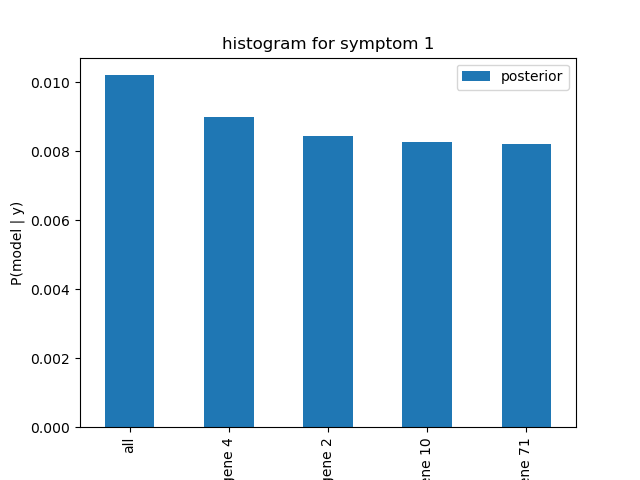

In [16]:
display(Image(filename="img/histogram_for_symptom_1.png", width = 600))

Plotting the posterior probabilities for symptom 2

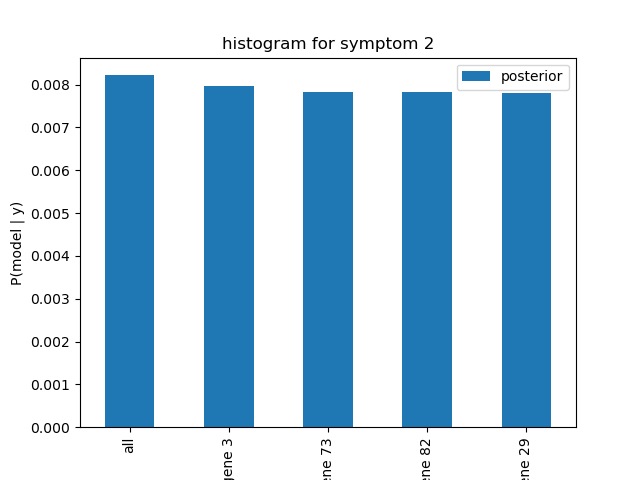

In [17]:
display(Image(filename="img/histogram_for_symptom_2.png", width = 600))

From the plots of the posterior probability for the model, we see that the full model has the highest posterior probability of the different models. This is likely related to the fact that the likelihood of the data is calculated using the model that was also fitted with this data. We see that the single covariates 'gene 4' and 'gene 3' are the models with the highest posterior probability for symptom 1 and symptom 2 respectively. This seems to support the accuracy score from the part above.


##### Experimental hybrid hierarchical

We also use cross-validation in order to reduce the overfitting, this turns into a hybrid version which is using training data to fit a model and then calculates the likelihood of test data by using this model. The results are shown below.

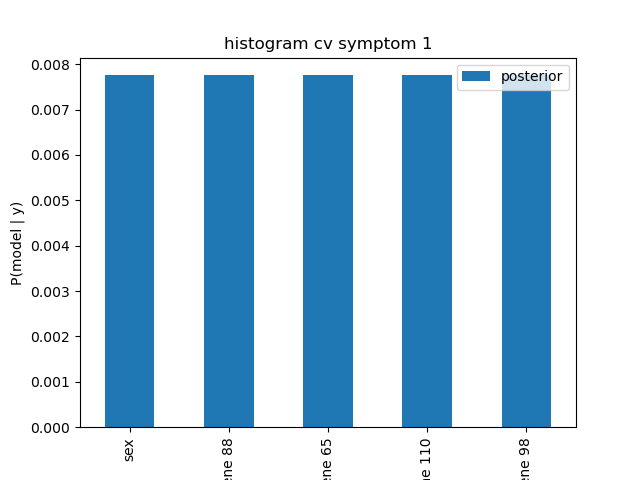

In [14]:
display(Image(filename="img/histogram_cv_symptom_1.png", width = 600))

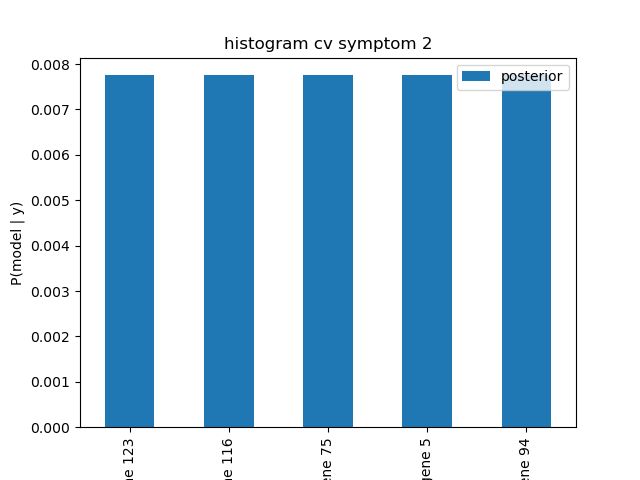

In [15]:
display(Image(filename="img/histogram_cv_symptom_2.png", width = 600))

#### Factors that may be important for disease epidemiology
The analyses we have performed so far seem to indicate that a multiple cause model is more likely. Allthough our variable selection procedure determined that single cause models were the best performing, the differnce in performance between the best performing model and the full model was small in absolute terms. The hypothesis testing of our logistic regression parameters, our K-modes clustering, and our hierarchical models all suggest that there are multiple covariates responsible for the symptoms. Which covariates these are our results disagree on. The full logistic regression suggests a handful of genes, while the hierarchical models suggest all covariates play a part. This result discrepancy could be due to the fact that the hierarchical models only tested all covariates for the multiple cause case. Our results also seem to indicate that certain genes, namely 2,3,4,60, and 99, play an important role in disease epidemiology. Further study of these genes in particular is warranted. Going forward we will be using a full model with all our covariates due to the evidence we have found in favour of a multiple cause model.

In an ideal world, we would know if we found a sufficient covariate for the outcome $y_t$. This would imply that the outcome would be conditionally independent of the policy given this covariate and the action $a_t$ (Dimitrakakis, 2020, pp. 137-138). Intuitively, if we knew that for example 'gene 3' was the sufficient covariate, we would need only to check this covariate for the different observations. 

More likely is maybe the case where one of the covariates found above is an instrumental variable? In this case, the instrumental variable is a "representation" of the underlying/latent variable that affects both the outcome $y_t$ and the action $a_t$ (Dimitrakakis, 2020, p. 138). If this instrumental variable is possible to measure it could still function as a proxy for the sufficient variable (which may be unobservable).

### Measuring the effect of actions

We now need to look into the action $a$ and the outcome $y$ followed by this action. Intuitively, what we would like to measure is $y_t | a_t$, that is, the outcome given the different actions (in this case therapeutic intervention). If we define $y_t = 1$ to be a positive outcome (positive outcome) and $y_t = 0$ a negative outcome (no effect of action). Then we could define $a_t = 0$ to be placebo (no intervention) and $a_t = 1$ to be the intervention/medication.

When looking at the outcome variable $y_t$ we could think of this as a Bernoulli distributed variable when $a_t$ is given. We could then look at the estimator for the utility of a policy given an action $a_t$. We then have

$$
\hat{E} (U|a_t = a) = \frac{\sum_{t \in a_t = a} U(a_t, y_t)}{|a_t = a|}
$$

adapted from (Dimitrakakis, 2020, pp. 140-141). For simplicity, we assume that we have an utility function $U(a_t = 1, y_t = 1) = 1$ which is, the observation were given a treatment ($a_t = 1$) and it did have a postive effect ($y_t = 1$). On the other hand $U(a_t = 1, y_t = 0) = 0$, the utility for treated observations which still has symptoms.

Similarily for those observations that got placebo treatment $a_t = 0$. This gives the following

$$
\begin{aligned}
U(a_t = 1, y_t = 1) = 1 \\
U(a_t = 1, y_t = 0) = 0 \\
U(a_t = 0, y_t = 1) = 1 \\
U(a_t = 0, y_t = 0) = 0
\end{aligned}
$$

This approach will simply look at the action $a$ and the outcome $y$ from the action. So this measurement will only check $y_t | a_t$ independent of the historical data $x_t$. So in a sense it is only measuring the action $a_t$ independently of the previous condition (symptoms) in $x_t$.

I then implemented the method

In [1]:
def measure_effect(self, action):
        """Calculates the measured effect of an action.

        Args:
            action: 1 for treatment and 0 for placebo

        Returns:
            The measured effect.
        """
        y_joined = [self.y_train, self.y_test]
        y = pd.concat(y_joined)
        y_array = self._to_flat_array(y)

        a_joined = [self.a_train, self.a_test]
        a = pd.concat(a_joined)
        a_array = self._to_flat_array(a)

        return self._utility(a_array, y_array, action)

with the (private) helper method

In [2]:
def _utility(self, a, y, at):
        """Calculates utility.

        Args:
            a: action array
            y: outcome array
            at: action to measure utility for

        Returns:
            Utility for observation.
        """
        num_at = len(np.where(a == at)[0])
        u = 0

        for i in range(len(a)):
            if a[i] == at and y[i] == 1:
                u += 1

        return u/num_at

running this on the entire dataset gave expected utility from the treatment $a_t = 1$ to be $\approx 66$ times larger than the expected utility from the placebo $a_t = 0$.

From the fact that the expected utility for active treatment is higher than the expected utility from the placebo, it could indicate that the active treatment should be recommended. We try to separate the 'symptom 1' cases from the 'symptom 2' cases. We then want to examine the expected utility of active treatment ($a_t = 1$) versus placebo ($a_t = 0$) and condition on the symptom. Trying to find this out, we implemented the following method

In [1]:
def measure_effect_symptom(self, action, symptom):
        """Calculates the measured effect of an action.

        Args:
            action: 1 for treatment and 0 for placebo
            symptom: separate observations based on symptom

        Returns:
            The measured effect.
        """
        y_joined = [self.y_train, self.y_test]
        y = pd.concat(y_joined)
        y_array = self._to_flat_array(y)

        a_joined = [self.a_train, self.a_test]
        a = pd.concat(a_joined)
        a_array = self._to_flat_array(a)

        x_joined = [self.x_train, self.x_test]
        x = pd.concat(x_joined)

        if symptom == 1:
            sym_idx = x.iloc[:, -2] == 1
        else:
            sym_idx = x.iloc[:, -1] == 1

        a_cond_sym = a_array[sym_idx]
        y_cond_sym = y_array[sym_idx]

        return self._utility(a_cond_sym, y_cond_sym, action)

and got the following results (for the entire dataset):

E(U|a_t = 0, sym = 1) = 0.01427469135802469

E(U|a_t = 1, sym = 1) = 0.5964479526393686

E(U|a_t = 0, sym = 2) = 0.008955223880597015

E(U|a_t = 1, sym = 2) = 0.5956112852664577

TODO add the case sym1 and sym2 and not sym1 or sym2.

Due to the exceedingly greater expected utility of the intervention compared to the placebo, there is reason to expect the intervention to affect the outcome of an illness.

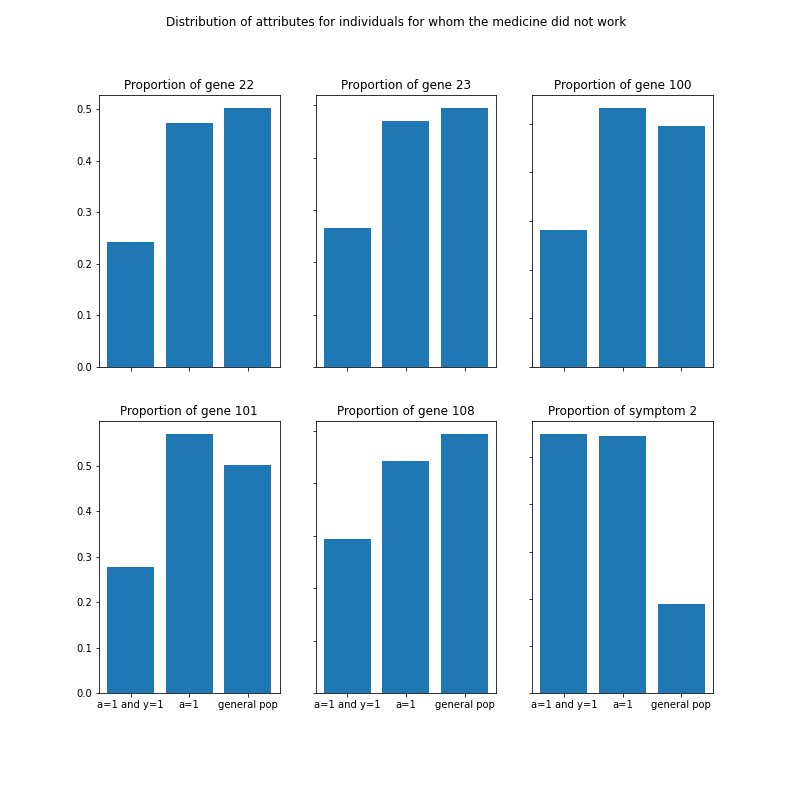

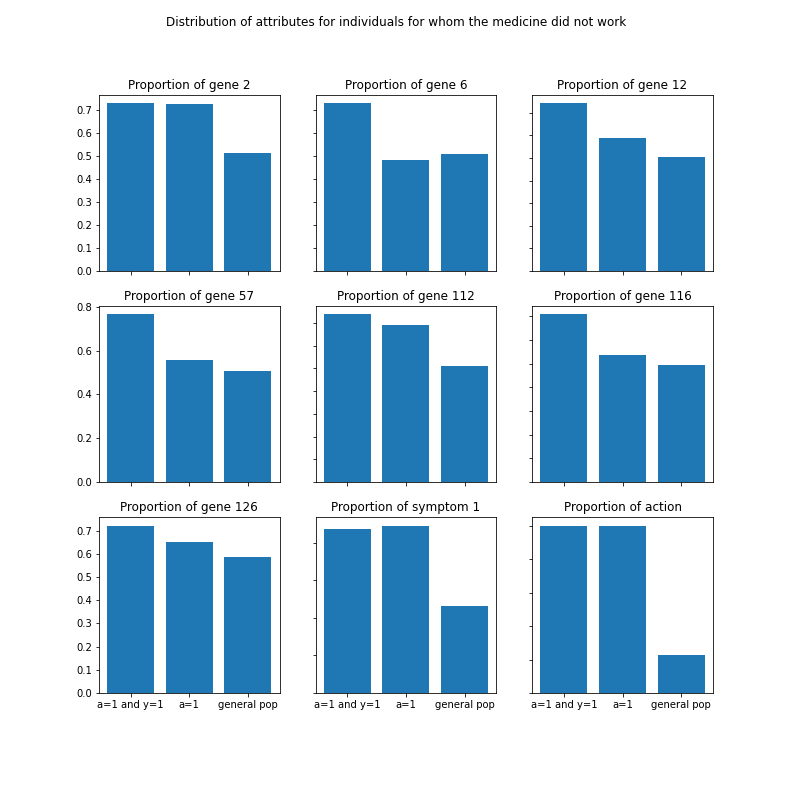

In [305]:
display(Image(filename="./proportion_diff_03.png", width = 600))
display(Image(filename="./proportion_diff_07.png", width = 600))

#### When should treatment not be given

We observe that there is an overrepresentation of some genes and an underrepresentation of others in the population $a=1\cap y=0$ compared to both the general population and $a=1\cap y=1$. We see little differences in the prevalence of the symptoms or the representation of sex or gender. These results imply that certain genes in their presence or absence contribute to the fact that the intervention does not work. This might be due to these genes causing or contributing to a different disease than the one targeted by the intervention, or that they interfere with the effect of the intervention in some way. Since interventions have costs and risks attached, the presence or absence of these genes should make one more hesitant to administer the intervention despite the expected utility reported earlier. A caveat of these findings is that they do not take into account higher order interactions between the genes, and should be taken with a pinch of salt.

# References

Borgan, Ø. (2019). Regresjon og konfundering - notat til STK1110. Retrieved from: https://www.uio.no/studier/emner/matnat/math/STK1110/h19/confounding-regresjon.pdf

Dawid, A. P. (2015). Statistical Causality from a Decision-Theoretic Perspective. Annual Review of Statistics and Its Application, 2(1), 273-303.

Dimitrakakis, C. (2020). Machine learning in science and society. Unpublished. Department of Informatics, University of Oslo.

Hastie, T., Tibshirani, R. & Friedman, J. (2016). The Elements of Statistical Learning. Data Mining,
Inference and Prediciton. New York, NY: Springer New York.

Huang, Z. (1998). Extensions to the k-Means Algorithm for Clustering Large Data Sets with Categorical Values. Data Mining and Knowledge Discovery 2, 283–304

James, G., Witten, D., Hastie, T. & Tibshirani, R. (2013). An Introduction to Statistical Learning (Vol. 103
Springer Texts in Statistics). New York, NY: Springer New York.

scikit learn. (2020, n.d.). sklearn.feature_selection.RFECV. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV

# Appendices

## Part 1

E[U|a_t = 1] = 0.5883376849434291
E[U|a_t = 0] = 0.008958712022851208
E[U|a_t = 1, sym = 1] = 0.5964479526393686
E[U|a_t = 1, sym = 2] = 0.5956112852664577
E[U|a_t = 0, sym = 1] = 0.01427469135802469
E[U|a_t = 0, sym = 2] = 0.008955223880597015


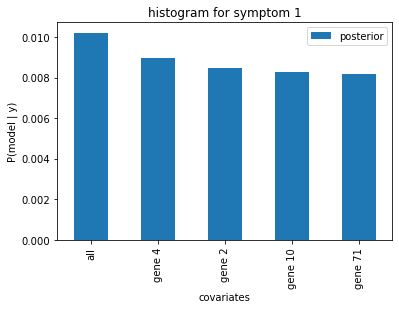

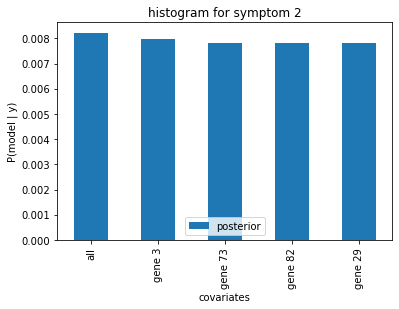

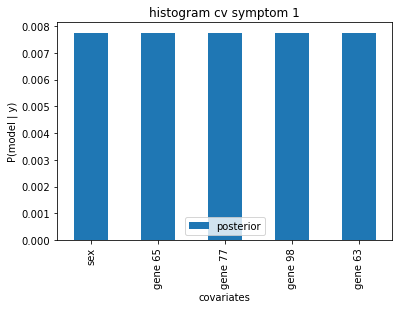

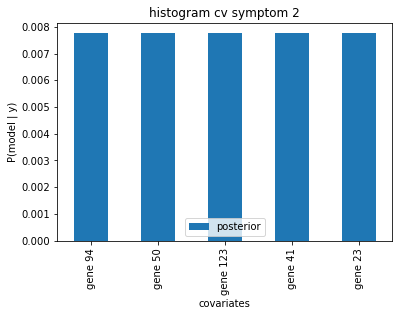

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss


class MedicalData:
    def __init__(self):
        self._get_data()

    def _get_data(self):
        """Gets the data and places it into three dataframes stored as instance
        variables of the object.
        """
        x = pd.read_csv("./data/medical/historical_X.dat",
                        sep=" ", header=None)
        personal_columns = ["sex", "smoker"]
        gene_columns = ["gene " + str(i) for i in range(1, 127)]
        symptom_columns = ["symptom 1", "symptom 2"]
        x_columns = personal_columns + gene_columns + symptom_columns
        x.columns = x_columns

        y = pd.read_csv("./data/medical/historical_Y.dat",
                        sep=" ", header=None)
        y.columns = ["outcome"]

        a = pd.read_csv("./data/medical/historical_A.dat",
                        sep=" ", header=None)
        a.columns = ["action"]

        self.x_train, self.x_test, self.y_train, self.y_test, self.a_train, self.a_test = train_test_split(
            x, y, a, test_size=0.3, random_state=1)

    def data_analysis(self):
        """

        """
        self.frequency_symptoms()
        self.variable_selection(3)

    def _plot_variable_selection(self, accuracy_score1, accuracy_score2, show=False):
        """Plots the accuracy score for the different symptoms.

        Args:
            accuracy_score1: the accuracy score from the CV of symptom 1
            accuracy_score2: the accuracy score from the CV of symptom 2
            show: whether or not to show the plot
        """
        fig, (axis1, axis2) = plt.subplots(1, 2)
        fig.suptitle("Accuracy score for variable selection")

        axis1.plot(range(1, len(accuracy_score1) + 1), accuracy_score1)
        axis1.set_title("Symptom 1")
        axis1.set_ylabel("Accuracy score")
        axis1.set_xlabel("Number of covariates")
        axis2.plot(range(1, len(accuracy_score2) + 1), accuracy_score2)
        axis2.set_title("Symptom 2")
        axis2.set_xlabel("Number of covariates")

        if show:
            plt.show()
        else:
            plt.savefig("img/var_sel.png")

    def variable_selection(self, num_folds):
        """Performs variable selection using a num_folds cross-validation.

        RFECV adapted from https://scikit-learn.org/stable/auto_examples/
        feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-
        examples-feature-selection-plot-rfe-with-cross-validation-py

        Args:
            num_folds: the number of folds to use in the cross-validation
        """
        logistic_regression = LogisticRegression(max_iter=1000)
        variable_selection_cv = RFECV(
            estimator=logistic_regression, step=1, cv=StratifiedKFold(num_folds, random_state=1), scoring='accuracy')

        x = self.x_train.iloc[:, : -2]
        symptom1 = self.x_train.iloc[:, -2]
        symptom2 = self.x_train.iloc[:, -1]

        # symptom 1
        variable_selection_cv.fit(x, symptom1)
        accuracy_symptom1 = variable_selection_cv.grid_scores_
        symptom1_indices = np.where(
            variable_selection_cv.support_ == True)[0]
        print(f"Symptom 1 covariates = {x.columns[symptom1_indices]}")

        # symptom 2
        variable_selection_cv.fit(x, symptom2)
        accuracy_symptom2 = variable_selection_cv.grid_scores_
        symptom2_indices = np.where(
            variable_selection_cv.support_ == True)[0]
        print(f"Symptom 2 covariates = {x.columns[symptom2_indices]}")

        self._plot_variable_selection(accuracy_symptom1, accuracy_symptom2)

    def frequency_symptoms(self, show=False):
        """Generates simple histogram showing the frequency of the different 
        symptoms. Looks at the entire dataset when considering the frequency.

        Args:
            show: whether or not to show the plot
        """
        x_joined = [self.x_train, self.x_test]
        x = pd.concat(x_joined)

        fig, (axis1, axis2) = plt.subplots(1, 2)
        fig.suptitle("Histogram of symptoms")
        axis1.hist(x["symptom 1"], color='b')
        axis1.set_title("Symptom 1")
        axis2.hist(x["symptom 2"], color='r')
        axis2.set_title("Symptom 2")

        if show:
            plt.show()
        else:
            plt.savefig("img/freq_hist.png")

    def measure_effect(self, action):
        """Calculates the measured effect of an action.

        Args:
            action: 1 for treatment and 0 for placebo

        Returns:
            The measured effect.
        """
        y_joined = [self.y_train, self.y_test]
        y = pd.concat(y_joined)
        y_array = self._to_flat_array(y)

        a_joined = [self.a_train, self.a_test]
        a = pd.concat(a_joined)
        a_array = self._to_flat_array(a)

        return self._utility(a_array, y_array, action)

    def measure_effect_symptom(self, action, symptom):
        """Calculates the measured effect of an action.

        Args:
            action: 1 for treatment and 0 for placebo
            symptom: separate observations based on symptom

        Returns:
            The measured effect.
        """
        y_joined = [self.y_train, self.y_test]
        y = pd.concat(y_joined)
        y_array = self._to_flat_array(y)

        a_joined = [self.a_train, self.a_test]
        a = pd.concat(a_joined)
        a_array = self._to_flat_array(a)

        x_joined = [self.x_train, self.x_test]
        x = pd.concat(x_joined)

        if symptom == 1:
            sym_idx = x.iloc[:, -2] == 1
        else:
            sym_idx = x.iloc[:, -1] == 1

        a_cond_sym = a_array[sym_idx]
        y_cond_sym = y_array[sym_idx]

        return self._utility(a_cond_sym, y_cond_sym, action)

    def _to_flat_array(self, df):

        numpy_array = df.to_numpy()
        return numpy_array.flatten()

    def _utility(self, a, y, at):
        """Calculates utility.

        Args:
            a: action array
            y: outcome array
            at: action to measure utility for

        Returns:
            Utility for observation.
        """
        num_at = len(np.where(a == at)[0])
        u = 0

        for i in range(len(a)):
            if a[i] == at and y[i] == 1:
                u += 1

        return u/num_at

    def hierarchical_model(self, data, symptom):
        """Calculates the hierarchical model for the medical data.

        Args:
            data: the data to calculate the posterior probability
            symptom: which symptom to use as response variable

        Returns:
            Posterior probabilites in a Pandas dataframe.
        """
        x = data.iloc[:, : -2]
        if symptom == 1:
            symptom = data.iloc[:, -2]
        else:
            symptom = data.iloc[:, -1]

        num_models = len(x.iloc[0])
        log_likelihoods = np.zeros(num_models + 1)
        model = LogisticRegression(max_iter=500)

        for i in range(0, num_models + 1):
            if i != num_models:
                single_column = x.iloc[:, i].to_numpy()
                single_covariate = single_column.reshape(-1, 1)
                log_reg = model.fit(single_covariate, symptom)
                p_t = log_reg.predict_proba(single_covariate)
                log_likelihoods[i] = -log_loss(symptom, p_t)
            else:
                log_reg = model.fit(x, symptom)
                p_t = log_reg.predict_proba(x)
                log_likelihoods[i] = -log_loss(symptom, p_t)

        # calculating the posterior
        likelihood = np.exp(log_likelihoods)
        prior = np.repeat(1/(num_models + 1), num_models + 1)
        p_y = np.sum(likelihood*prior)
        posterior = (likelihood*prior)/p_y

        # constructing the dataframe
        last_index = pd.Index(data=["all"])
        model_names = x.columns.append(last_index)
        posterior_df = pd.DataFrame(data=posterior, index=model_names)
        posterior_df.columns = ["posterior"]

        return posterior_df

    def _calculate_posterior(self, xtrain, xtest, ytrain, ytest):
        """Calculates the posterior of a test set using a model fitted on 
        training data.

        Args:
            xtrain: training covariates
            xtest: test covariates
            ytrain: training response
            ytest: test response

        Returns:
            The posterior probability of the different models.
        """
        num_models = len(xtrain.iloc[0])
        log_likelihoods = np.zeros(num_models + 1)

        model = LogisticRegression(max_iter=500)

        for i in range(0, num_models + 1):
            if i != num_models:
                single_column = xtrain.iloc[:, i].to_numpy()
                single_covariate = single_column.reshape(-1, 1)
                log_reg = model.fit(single_covariate, ytrain)

                single_column_test = xtest.iloc[:, i].to_numpy()
                single_covariate_test = single_column_test.reshape(-1, 1)
                p_t = log_reg.predict_proba(single_covariate_test)

                log_likelihoods[i] = -log_loss(ytest, p_t)
            else:
                log_reg = model.fit(xtrain, ytrain)

                p_t = log_reg.predict_proba(xtest)
                log_likelihoods[i] = -log_loss(ytest, p_t)

        likelihood = np.exp(log_likelihoods)
        prior = np.repeat(1/(num_models + 1), num_models + 1)
        p_y = np.sum(likelihood*prior)
        posterior = (likelihood*prior)/p_y

        return posterior

    def hierarchical_model_cv(self, symptom, k):
        """Calculates the hierarchical model for the medical data.

        Args:
            symptom: which symptom to use as response variable
            k: the number of folds to use in the cross-validation

        Returns:
            Posterior probabilites in a Pandas dataframe.
        """

        num_models = len(self.x_train.iloc[0]) - 1
        # (folds, models)
        cv_posterior = np.zeros((k, num_models))

        x_joined = [self.x_train, self.x_test]
        x_raw = pd.concat(x_joined)
        x = x_raw.iloc[:, : -2]

        if symptom == 1:
            y = x.iloc[:, -2]
        else:
            y = x.iloc[:, -1]

        kf = KFold(n_splits=k, shuffle=True)
        k_counter = 0

        for train_indices, test_indices in kf.split(x):
            xtrain = x.iloc[train_indices, :]
            ytrain = y[train_indices]
            xtest = x.iloc[test_indices, :]
            ytest = y[test_indices]

            posterior = self._calculate_posterior(xtrain, xtest, ytrain, ytest)
            cv_posterior[k_counter, :] = posterior
            k_counter += 1

        posterior = np.mean(cv_posterior, 0)

        # constructing the dataframe
        last_index = pd.Index(data=["all"])
        model_names = x.columns.append(last_index)
        posterior_df = pd.DataFrame(data=posterior, index=model_names)
        posterior_df.columns = ["posterior"]

        return posterior_df


def plot_posteriors(posteriors, num, title, show=True):
    """Plots the top k posterios.

    Args:
        posteriors: sorted Pandas dataframe with posteriors
        num: the number of posteriors to plot
        title: title of the histogram
        show: whether or not to show the plot
    """
    plot_posteriors = posteriors.sort_values(
        by="posterior", ascending=False)[:num]

    plot_posteriors.plot.bar()
    plt.title(title)
    plt.xlabel("covariates")
    plt.ylabel("P(model | y)")

    if show:
        plt.show()
    else:
        filename = title.replace(" ", "_") + ".png"
        plt.savefig("img/" + filename)


if __name__ == "__main__":
    data = MedicalData()
    # data.data_analysis()
    expected_utility_1 = data.measure_effect(1)
    expected_utility_0 = data.measure_effect(0)
    print(f"E[U|a_t = 1] = {expected_utility_1}")
    print(f"E[U|a_t = 0] = {expected_utility_0}")

    util_sym1_a1 = data.measure_effect_symptom(1, 1)
    util_sym2_a1 = data.measure_effect_symptom(1, 2)
    util_sym1_a0 = data.measure_effect_symptom(0, 1)
    util_sym2_a0 = data.measure_effect_symptom(0, 2)
    print(f"E[U|a_t = 1, sym = 1] = {util_sym1_a1}")
    print(f"E[U|a_t = 1, sym = 2] = {util_sym2_a1}")
    print(f"E[U|a_t = 0, sym = 1] = {util_sym1_a0}")
    print(f"E[U|a_t = 0, sym = 2] = {util_sym2_a0}")

    x_joined = [data.x_train, data.x_test]
    x = pd.concat(x_joined)
    sym1_posteriors = data.hierarchical_model(x, 1)
    plot_posteriors(sym1_posteriors, 5, "histogram for symptom 1", show=False)

    sym2_posteriors = data.hierarchical_model(x, 2)
    plot_posteriors(sym2_posteriors, 5, "histogram for symptom 2", show=False)

    sym1_cv_posteriors = data.hierarchical_model_cv(1, 5)
    plot_posteriors(sym1_cv_posteriors, 5,
                    "histogram cv symptom 1", show=False)

    sym2_cv_posteriors = data.hierarchical_model_cv(2, 5)
    plot_posteriors(sym2_cv_posteriors, 5,
                    "histogram cv symptom 2", show=False)



In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [263]:
x = pd.read_csv("./data/medical/historical_X.dat",
                        sep=" ", header=None)
personal_columns = ["sex", "smoker"]
gene_columns = ["gene " + str(i) for i in range(1, 127)]
symptom_columns = ["symptom 1", "symptom 2"]
x_columns = personal_columns + gene_columns + symptom_columns
x.columns = x_columns

y = pd.read_csv("./data/medical/historical_Y.dat",
                        sep=" ", header=None)
y.columns = ["outcome"]

a = pd.read_csv("./data/medical/historical_A.dat",
                        sep=" ", header=None)
a.columns = ["action"]
x_train, x_test, y_train, y_test, a_train, a_test = train_test_split(
            x, y, a, test_size=0.3, random_state=1)

In [37]:
x.head()

,sex,smoker,gene 1,gene 2,gene 3,gene 4,gene 5,gene 6,gene 7,gene 8,...,gene 119,gene 120,gene 121,gene 122,gene 123,gene 124,gene 125,gene 126,symptom 1,symptom 2
0,0,0,0,0,1,1,0,0,1,1,...,0,1,1,0,1,1,0,0,1,0
1,0,1,0,1,0,1,0,0,1,0,...,0,1,0,1,0,1,0,1,0,0
2,0,0,1,1,0,0,1,1,0,0,...,0,0,0,1,0,0,1,1,0,0
3,1,1,1,0,0,0,1,1,0,0,...,1,0,1,1,0,0,1,1,0,0
4,0,1,0,1,0,1,1,1,1,1,...,0,0,0,1,0,1,0,1,1,0


In [38]:
xs_train = x.iloc[:, :-2]
s1_train = x.iloc[:, -2]
s2_train = x.iloc[:, -1]

In [5]:
y.head()

,outcome
0,1
1,0
2,0
3,0
4,0


In [7]:
a.head()

,action
0,1
1,0
2,0
3,0
4,0


In [39]:
import statsmodels.api as sm
log_reg_s1 = sm.Logit(s1_train, xs_train).fit()
log_reg_s2 = sm.Logit(s2_train, xs_train).fit()

Optimization terminated successfully.
         Current function value: 0.399682
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.258782
         Iterations 8


In [47]:
s_1_significant_params_05 = []
s_2_significant_params_05 = []
for index, item in enumerate(log_reg_s1.pvalues):
    if item<0.05:
        s_1_significant_params_05.append(log_reg.pvalues.index[index])
for index, item in enumerate(log_reg_s2.pvalues):
    if item<0.05:
        s_2_significant_params_05.append(log_reg.pvalues.index[index])      

In [268]:
print("Significant parameters for a regression on Symptom 1: ", s_1_significant_params_05)
print("Significant parameters for a regression on Symptom 2: ", s_2_significant_params_05)

Significant parameters for a regression on Symptom 1:  ['gene 2', 'gene 3', 'gene 4', 'gene 25', 'gene 34', 'gene 51', 'gene 53', 'gene 60', 'gene 69', 'gene 74', 'gene 78', 'gene 82', 'gene 89', 'gene 99', 'gene 100', 'gene 119', 'gene 120', 'gene 125']
Significant parameters for a regression on Symptom 2:  ['smoker', 'gene 2', 'gene 3', 'gene 5', 'gene 8', 'gene 13', 'gene 42', 'gene 44', 'gene 45', 'gene 47', 'gene 56', 'gene 57', 'gene 60', 'gene 76', 'gene 80', 'gene 97', 'gene 99', 'gene 104']


In [269]:
intersection_05 = set.intersection(set(s_1_significant_params_05), set(s_2_significant_params_05))
print(intersection_05)

{'gene 60', 'gene 2', 'gene 99', 'gene 3'}


We see in both models that there are multiple significant factors at the 0.05 levels.  Additionally, there is an overlap between the models of genes that are significant for both symptoms. This suggests a multiple cause model, contrary to the earlier recursive feature elimination results. It is interesting to note that the single factors chosen by the recursive feature eliminations are present in those that are significant in the full model. These results suggest that genes 2, 3, 60, and 99 are important for disease epidemiology, as they are significant in both models. Further study of these genes is warranted based on the results of this model. However, considering the issues with p-values outlined in Dimitrakakis p. 53, which includes the fact that they only measure the fit on the data, we will corroborate these findings with other methods.

## Clustering K-modes

symptom 2    0.094857
smoker       0.271143
symptom 1    0.463429
gene 20      0.483286
gene 51      0.484286
               ...   
gene 107     0.512714
gene 2       0.513571
gene 73      0.516000
gene 47      0.516143
gene 126     0.585714
Length: 130, dtype: float64

In [77]:
from kmodes.kmodes import KModes
km = KModes(n_clusters=2, init='Huang', n_init=10, verbose=1)

clusters = km.fit_predict(x_train)
centroids = km.cluster_centroids_
# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 892, cost: 345393.0
Run 1, iteration: 2/100, moves: 565, cost: 343479.0
Run 1, iteration: 3/100, moves: 392, cost: 341798.0
Run 1, iteration: 4/100, moves: 295, cost: 340952.0
Run 1, iteration: 5/100, moves: 229, cost: 340675.0
Run 1, iteration: 6/100, moves: 210, cost: 340110.0
Run 1, iteration: 7/100, moves: 69, cost: 340110.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 989, cost: 341551.0
Run 2, iteration: 2/100, moves: 470, cost: 340063.0
Run 2, iteration: 3/100, moves: 130, cost: 340063.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 664, cost: 355733.0
Run 3, iteration: 2/100, moves: 341, cost: 354907.0
Run 3, iteration: 3/100, moves: 526, cost: 348055.0
Run 3, iteration: 4/100, moves: 901, cost: 343598.0
Run 3, iteration: 5/100, moves: 4

In [75]:
def levenstein_distance(x,y):
    z = np.array(x)+y
    return_v = 0
    for i in z:
        if i ==1:
            return_v+=1
    return return_v

Since the mean is poorly defined for binary categorical variables, we shall instead attempt k-modes clustering based on Huang 1998. The distance metric used in this case is the levenstein distance (cite), defined as $$d(X, Y) = \sum_{i=1}^{n}\delta(x_i, y_i)$$ where $\delta(x_i, y_i) = 0$ if $(x_i=y_i)$ and $\delta(x_i, y_i) = 1$ if $(x_i\neq y_i)$. Using this, the we desire to minimes the function $$P(W, Q) = \sum_{l=1}^{k}\sum_{i=1}^{n}\sum_{j=1}^{m}\omega_{i,l}\delta*(x_{i,j},q_{l,j})
$$
Where W is a partition of the dataset and $Q$ is the set of cluster vectors. This function is minimised by allocating observations to the cluster whose mode is nearest to it in levenstein distance. We update the mode after each allocation. After all the observations have been allocated we recheck the distance between all the observations and the clusters. We repeat this process until no observation changes cluster.

In [92]:
k_modes = x_train.copy()

In [93]:
d_1 = k_modes.apply(levenstein_distance, y=centroids[0], axis=1)

In [94]:
d_2 = k_modes.apply(levenstein_distance, y=centroids[1], axis=1)

In [95]:
k_modes["distance_cluster_1"] = d_1
k_modes["distance_cluster_2"] = d_2

In [97]:
def cluster_assigner(x):
    if x[-1]>=x[-2]:
        return 0
    else:
        return 1

In [98]:
k_modes["cluster"] = k_modes.apply(cluster_assigner, axis=1)

In [104]:
sum_k_modes = k_modes.groupby(["cluster"], as_index=False).sum()

In [242]:
no_sympt = [0,0]
both_sympt = [0,0]
sympt_1 = [0,0]
sympt_2 = [0,0]
for i in range(len(k_modes)):
    el = k_modes.iloc[i]
    if el[-4]==0 and el[-5]==0:
        no_sympt[el[-1]]+=1
    elif el[-4]==1 and el[-5]==1:
        both_sympt[el[-1]]+=1
    elif el[-4]==0 and el[-5]==1:
        sympt_1[el[-1]]+=1
    elif el[-4]==1 and el[-5]==0:
        sympt_2[el[-1]]+=1

In [247]:
import matplotlib.pyplot as plt

['cluster 1', 'cluster 2']

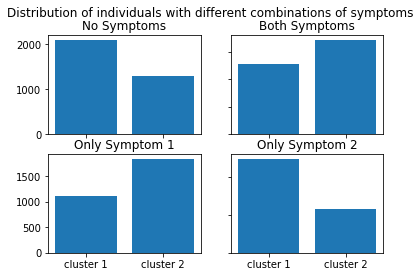

In [255]:
x_axis = ["cluster 1", "cluster 2"]
fig, axs = plt.subplots(2, 2)
axs[0, 0].bar(x_axis, no_sympt)
axs[0, 0].set_title("No Symptoms")
axs[0, 1].bar(x_axis, both_sympt)
axs[0, 1].set_title("Both Symptoms")
axs[1, 0].bar(x_axis, sympt_1)
axs[1, 0].set_title("Only Symptom 1")
axs[1, 1].bar(x_axis, sympt_2)
axs[1, 1].set_title("Only Symptom 2")
fig.suptitle("Distribution of individuals with different combinations of symptoms")

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
#fig.savefig("/Users/mjdioli/Documents/STK-IN5000/ml-society-science/src/project-2/clustering.png")

In [139]:
placebo = 0
intervention = 0
action_and_stays_sick = 0
for a, y in zip(a_train["action"], y_train["outcome"]):
    if a== 1:
        if y==1:
            intervention+=1
        else:
            action_and_stays_sick+=1
    else:
        if y==1:
            placebo+=1

In [128]:
placebo

50

In [129]:
intervention

939

In [140]:
action_and_stays_sick

663

In [259]:
comb = x_train.copy()
comb["action"] = a_train["action"]
comb["outcome"] = y_train["outcome"]

In [260]:
combo = comb.loc[(comb["action"]==1)&(comb["outcome"]==0)]

gene 22      0.242836
gene 23      0.265460
gene 100     0.280543
gene 101     0.277526
gene 108     0.294118
symptom 2    0.274510
outcome      0.000000
dtype: float64


<BarContainer object of 3 artists>

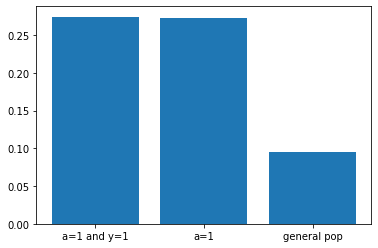

In [214]:
print(combo.sum(axis=0).apply(lambda x: x/len(combo))[lambda x: x<0.3])
presence_s2 = [combo.sum(axis=0).apply(lambda x: x/len(combo))[lambda x: x<0.3].loc["symptom 2"],
comb.loc[(comb["action"]==1)].sum(axis=0).apply(lambda x: x/len(comb.loc[(comb["action"]==1)])).loc["symptom 2"],
             comb.sum(axis=0).apply(lambda x: x/len(comb)).loc["symptom 2"]]
x_axis = ["a=1 and y=1", "a=1", "general pop"]
plt.bar(x_axis, presence_s2)

In [207]:
comb.loc[(comb["action"]==1)].sum(axis=0)

sex           827
smoker        481
gene 1        740
gene 2       1168
gene 3        869
             ... 
gene 126     1046
symptom 1    1428
symptom 2     437
action       1602
outcome       939
Length: 132, dtype: int64

gene 2       0.730015
gene 6       0.726998
gene 12      0.742081
gene 57      0.764706
gene 112     0.737557
gene 116     0.707391
gene 126     0.722474
symptom 1    0.874811
action       1.000000
dtype: float64


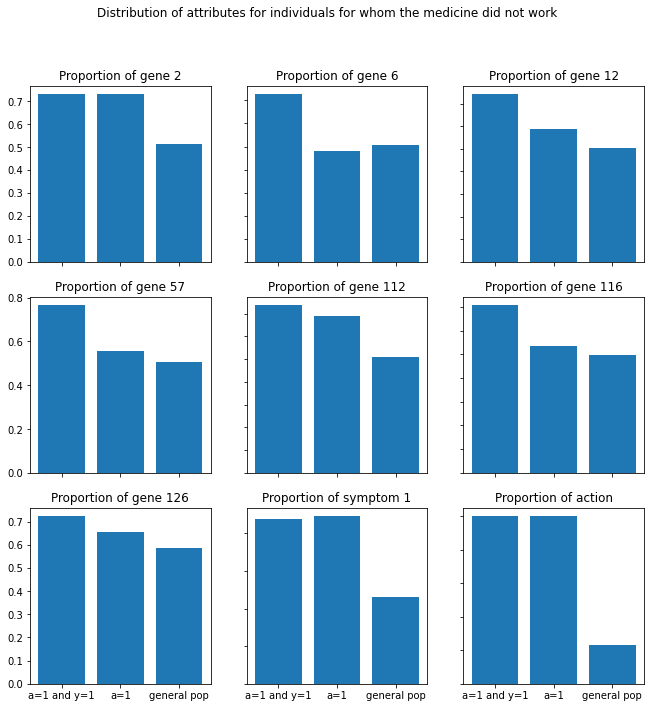

In [302]:
print(combo.sum(axis=0).apply(lambda x: x/len(combo))[lambda x: x>0.7])
fig, axs = plt.subplots(3, 3, figsize=(11,11))

# Hide x labels and tick labels for top plots and y ticks for right plots.

for i, ind in enumerate(list(combo.sum(axis=0).apply(lambda x: x/len(combo))[lambda x: x>0.7].index)):
    j=0
    presence_s2 = [combo.sum(axis=0).apply(lambda x: x/len(combo))[lambda x: x>0.7].loc[ind],
    comb.loc[(comb["action"]==1)].sum(axis=0).apply(lambda x: x/len(comb.loc[(comb["action"]==1)])).loc[ind],
                 comb.sum(axis=0).apply(lambda x: x/len(comb)).loc[ind]]
    x_axis = ["a=1 and y=1", "a=1", "general pop"]
    if 3<=i<=5:
        j=1
    elif 6<=i:
        j=2
    axs[j, i%3].bar(x_axis, presence_s2)
    axs[j, i%3].set_title("Proportion of "+ ind)
    #plt.title("Proportion of "+ ind +" in a population")
    #plt.savefig("/Users/mjdioli/Documents/STK-IN5000/ml-society-science/src/project-2/proportion_diff_07_" 
                #+ str(i) + ".png" )
    #plt.show()
for ax in axs.flat:
    ax.label_outer()
fig.suptitle("Distribution of attributes for individuals for whom the medicine did not work")
fig.savefig("/Users/mjdioli/Documents/STK-IN5000/ml-society-science/src/project-2/proportion_diff_07.png")

gene 22      0.242836
gene 23      0.265460
gene 100     0.280543
gene 101     0.277526
gene 108     0.294118
symptom 2    0.274510
outcome      0.000000
dtype: float64


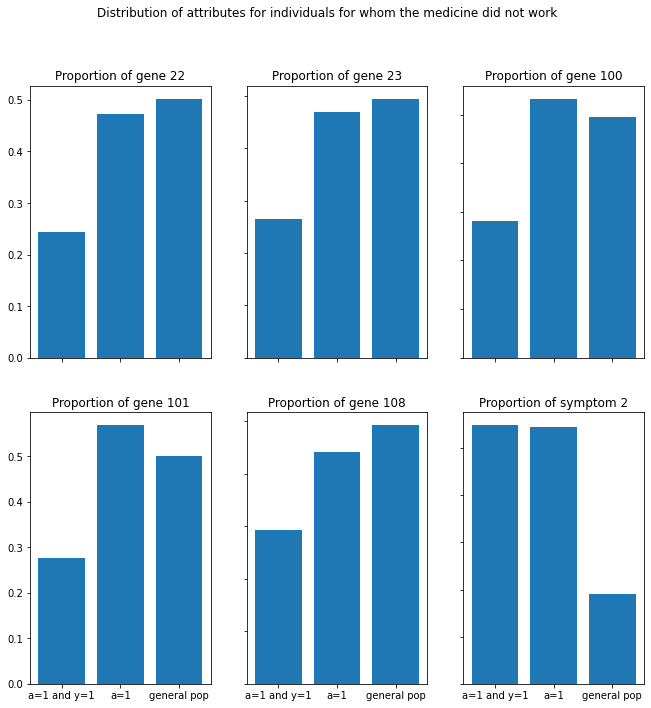

In [304]:
print(combo.sum(axis=0).apply(lambda x: x/len(combo))[lambda x: x<0.3])
fig, axs = plt.subplots(2, 3, figsize=(11,11))

# Hide x labels and tick labels for top plots and y ticks for right plots.

for i, ind in enumerate(list(combo.sum(axis=0).apply(lambda x: x/len(combo))[lambda x: x<0.3].index)):
    j=0
    presence_s2 = [combo.sum(axis=0).apply(lambda x: x/len(combo))[lambda x: x<0.3].loc[ind],
    comb.loc[(comb["action"]==1)].sum(axis=0).apply(lambda x: x/len(comb.loc[(comb["action"]==1)])).loc[ind],
                 comb.sum(axis=0).apply(lambda x: x/len(comb)).loc[ind]]
    x_axis = ["a=1 and y=1", "a=1", "general pop"]
    if 3<=i<=5:
        j=1
    elif 6<=i:
        j=2
    if i>=6:
        continue
    axs[j, i%3].bar(x_axis, presence_s2)
    axs[j, i%3].set_title("Proportion of "+ ind)
    #plt.title("Proportion of "+ ind +" in a population")
    #plt.savefig("/Users/mjdioli/Documents/STK-IN5000/ml-society-science/src/project-2/proportion_diff_07_" 
                #+ str(i) + ".png" )
    #plt.show()
for ax in axs.flat:
    ax.label_outer()
fig.suptitle("Distribution of attributes for individuals for whom the medicine did not work")
fig.savefig("/Users/mjdioli/Documents/STK-IN5000/ml-society-science/src/project-2/proportion_diff_03.png")

sex          0.484163
smoker       0.307692
gene 1       0.645551
gene 2       0.730015
gene 3       0.562594
               ...   
gene 126     0.722474
symptom 1    0.874811
symptom 2    0.274510
action       1.000000
outcome      0.000000
Length: 132, dtype: float64


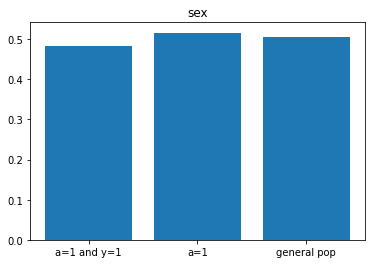

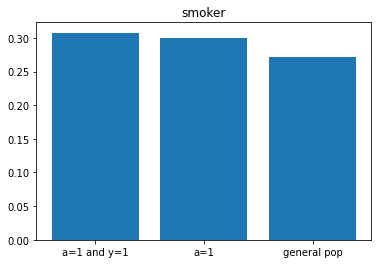

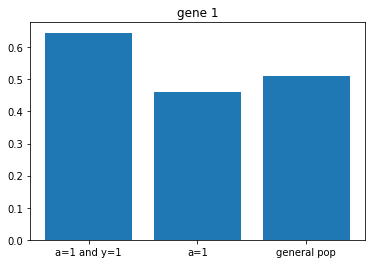

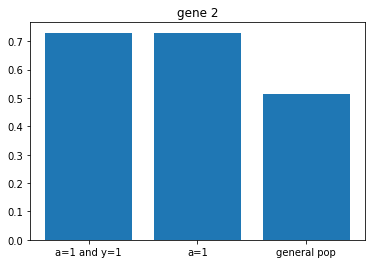

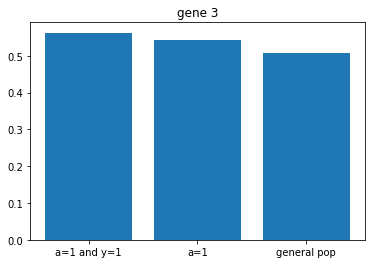

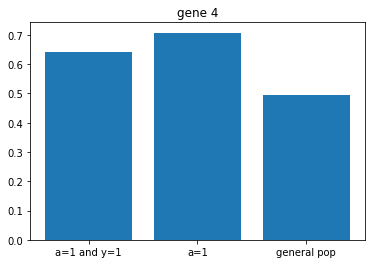

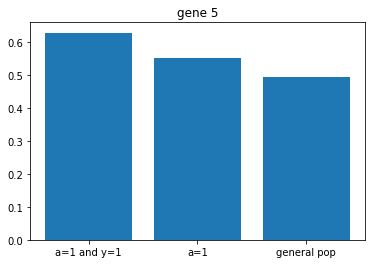

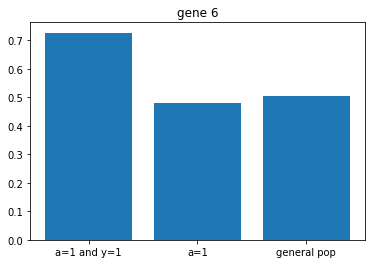

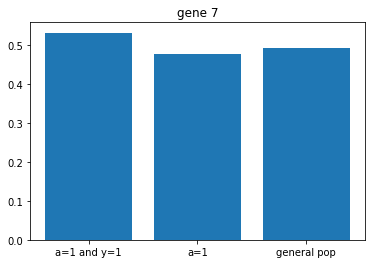

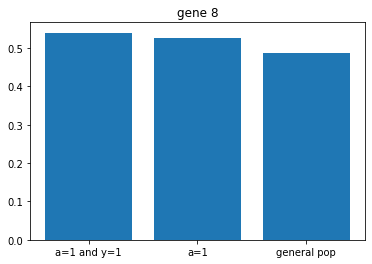

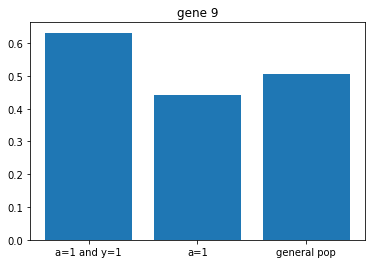

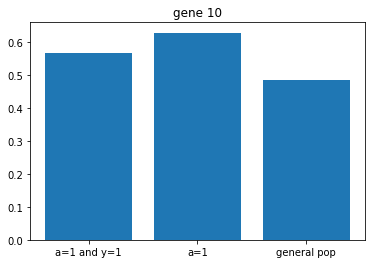

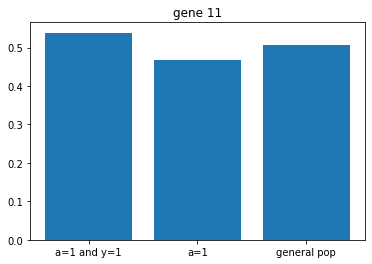

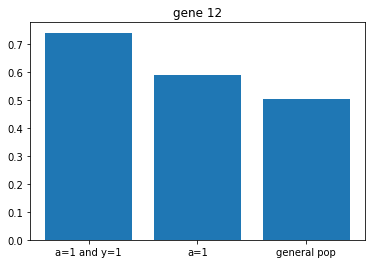

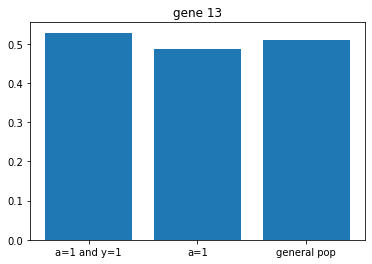

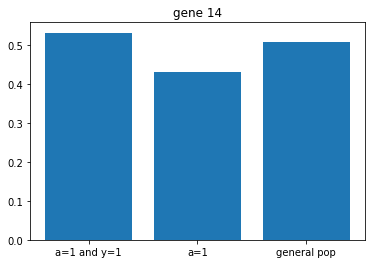

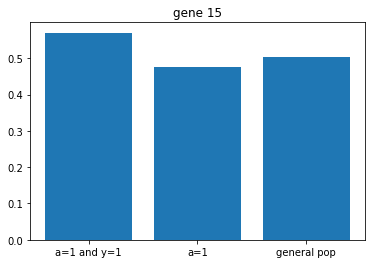

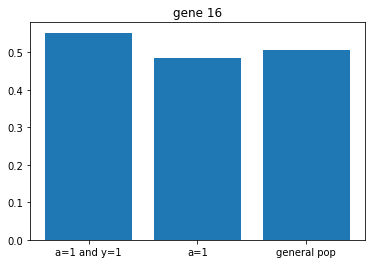

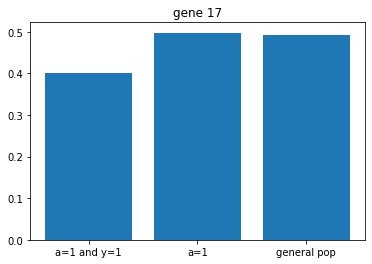

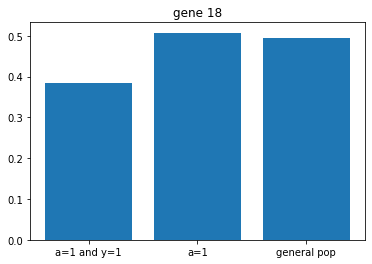

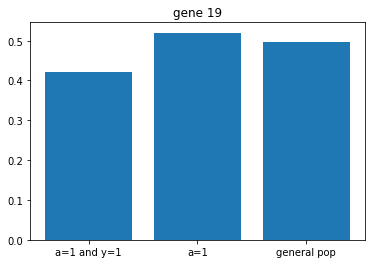

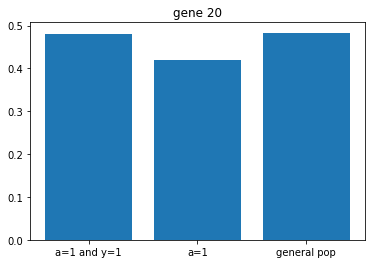

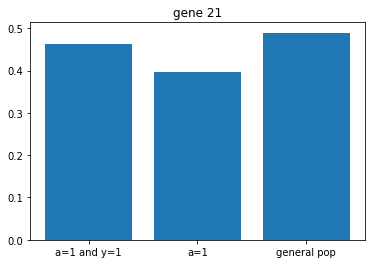

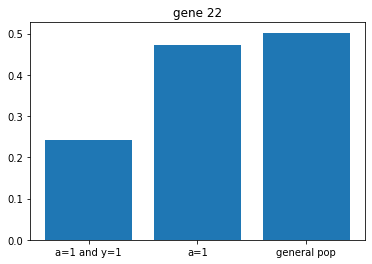

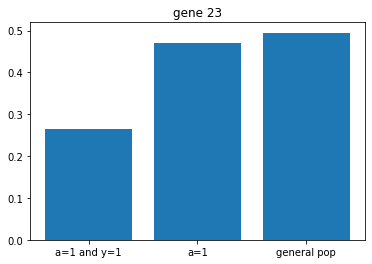

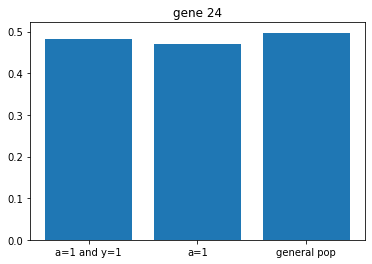

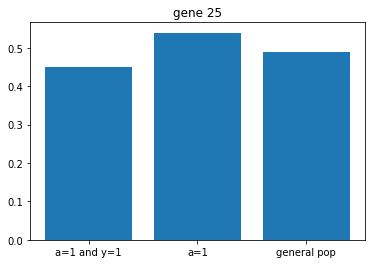

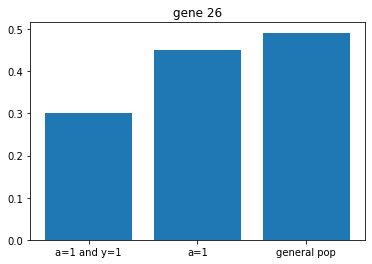

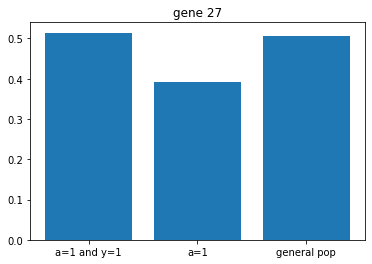

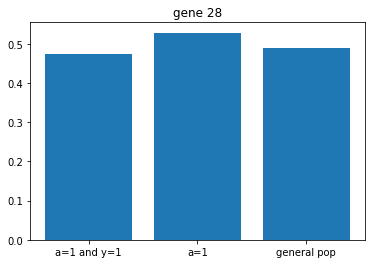

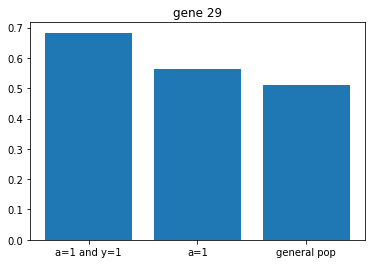

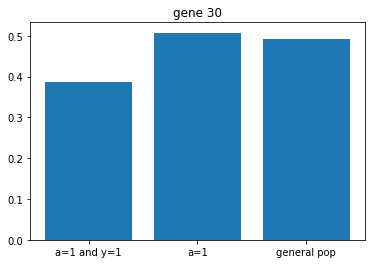

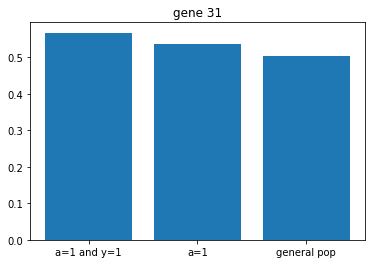

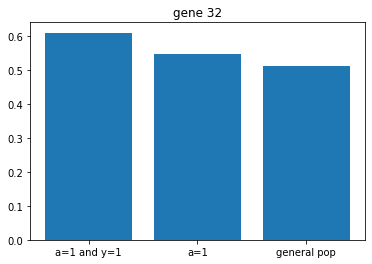

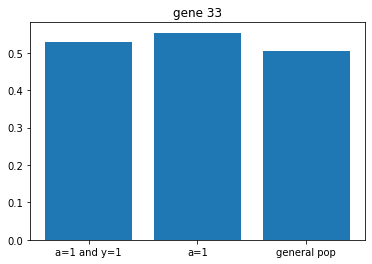

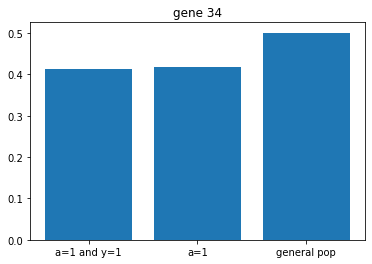

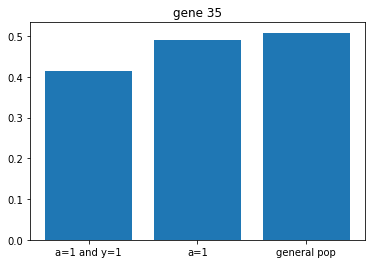

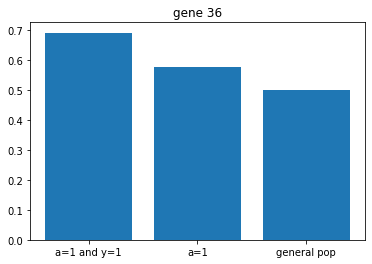

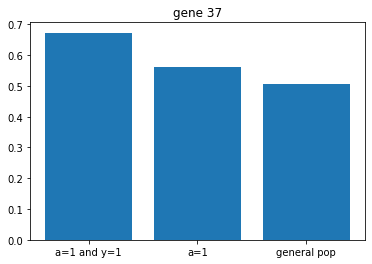

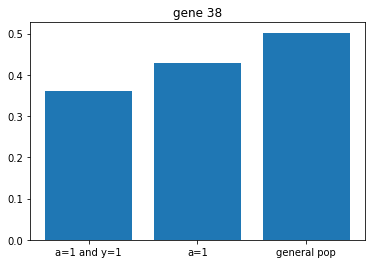

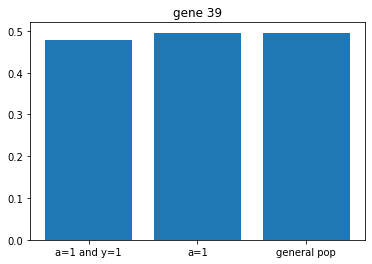

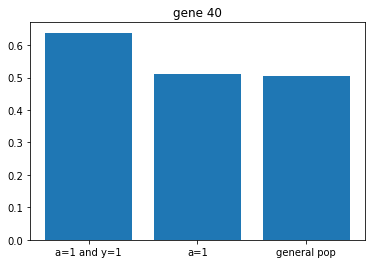

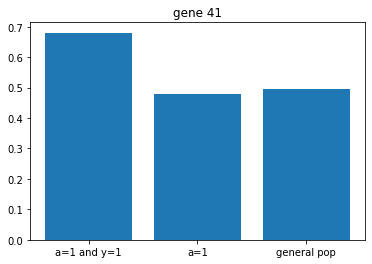

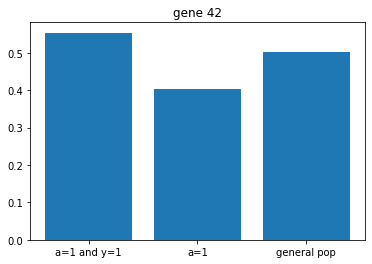

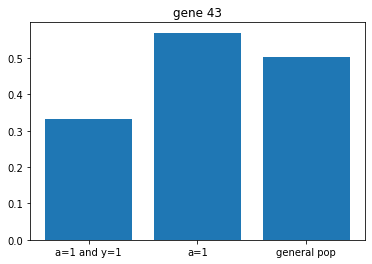

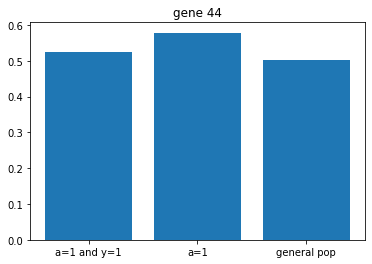

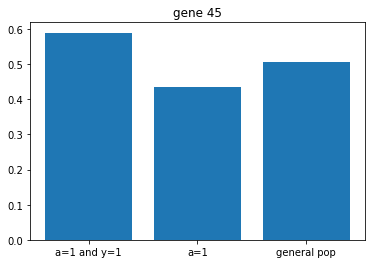

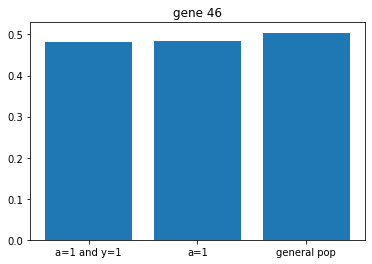

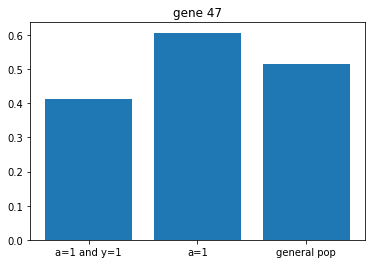

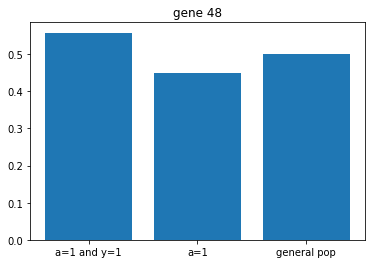

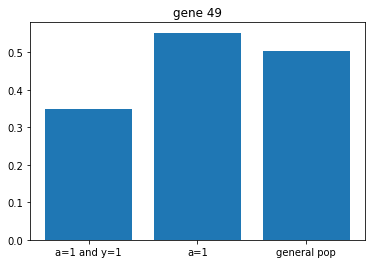

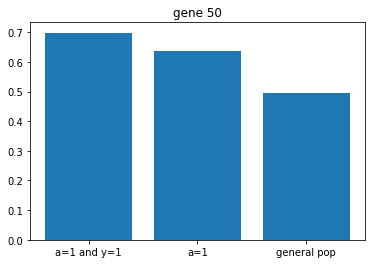

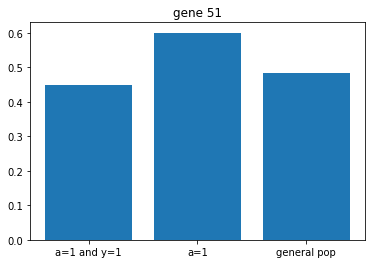

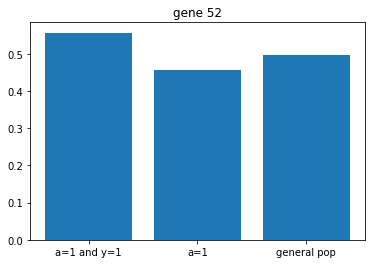

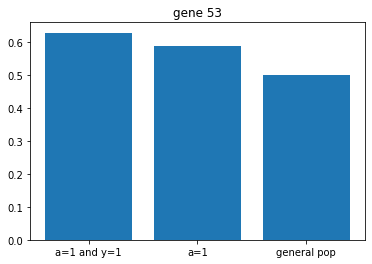

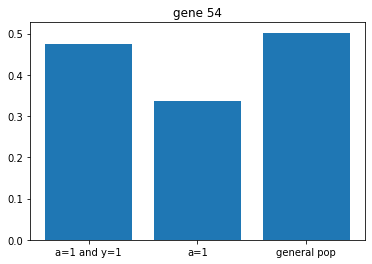

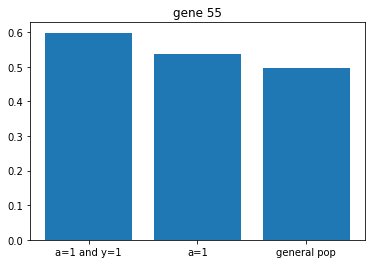

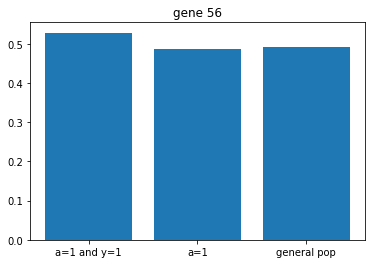

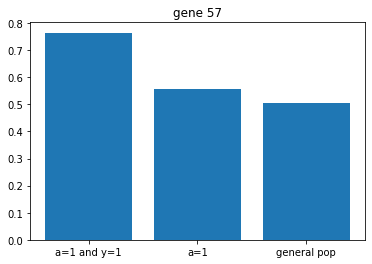

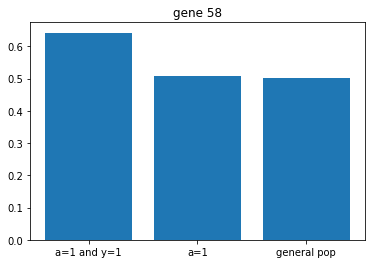

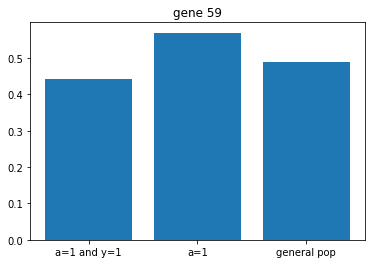

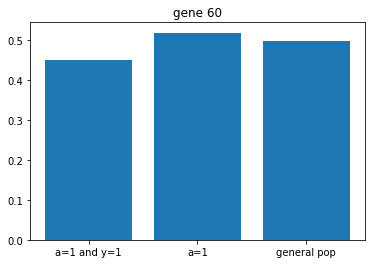

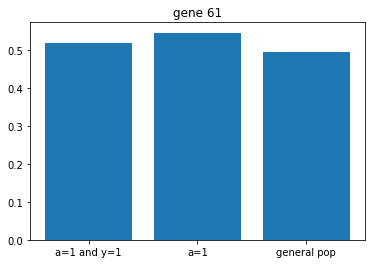

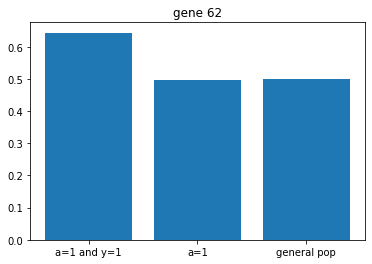

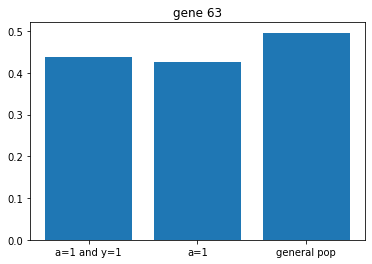

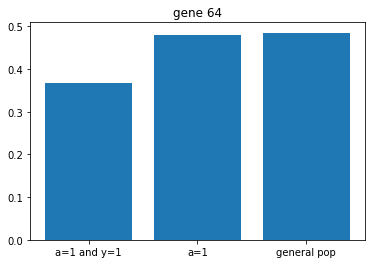

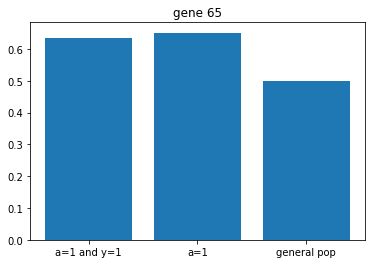

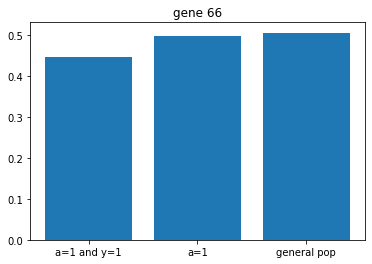

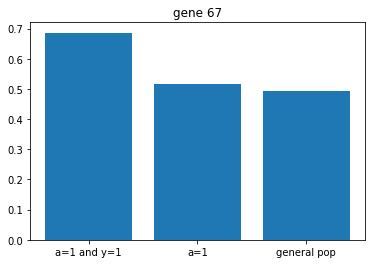

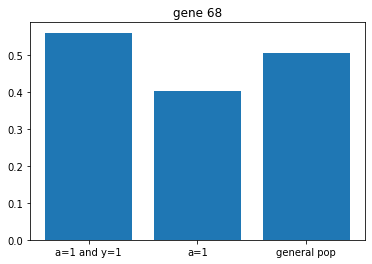

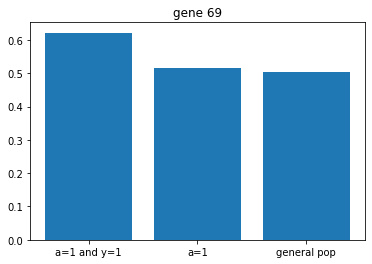

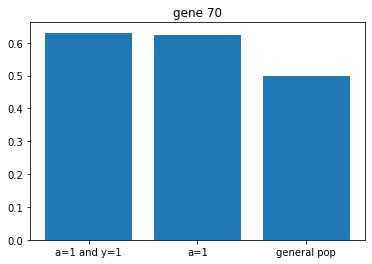

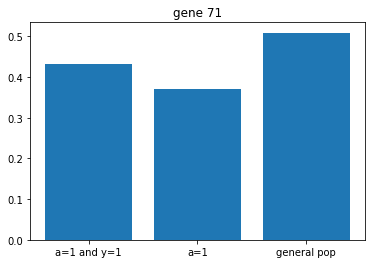

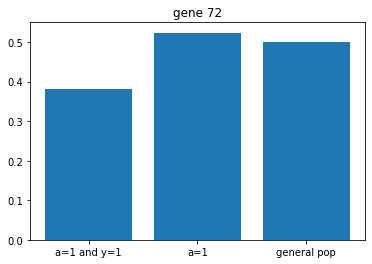

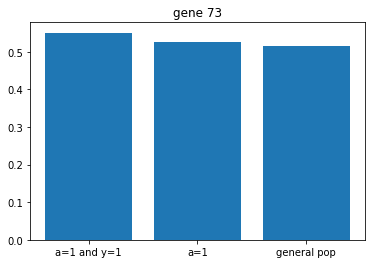

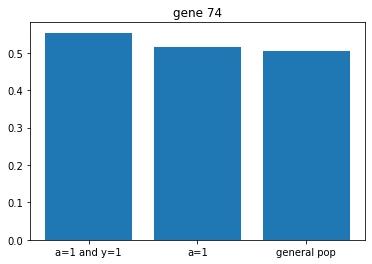

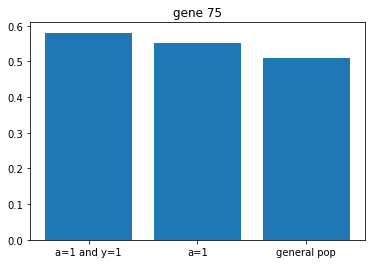

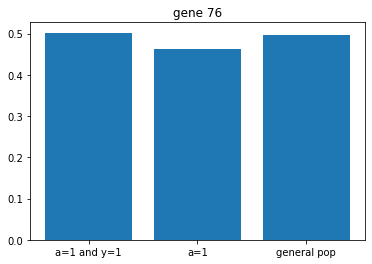

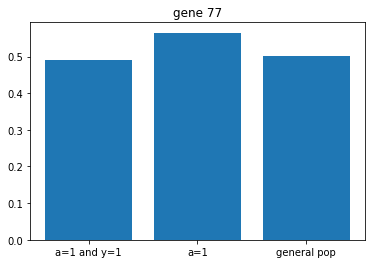

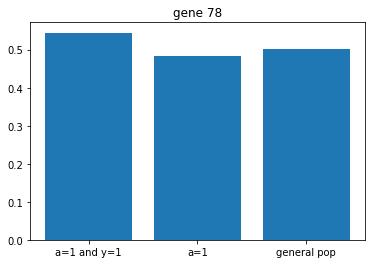

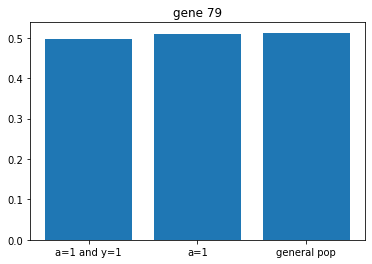

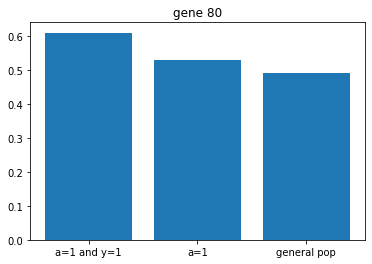

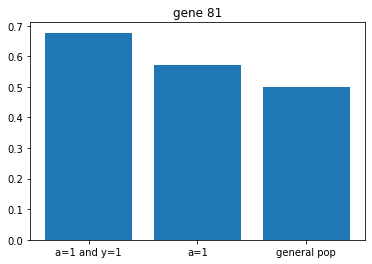

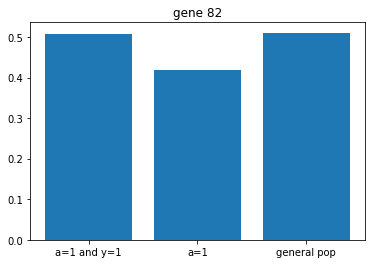

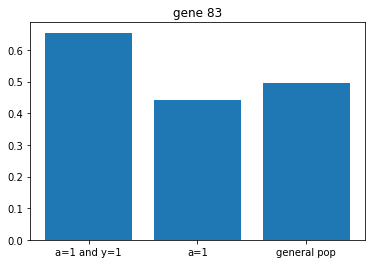

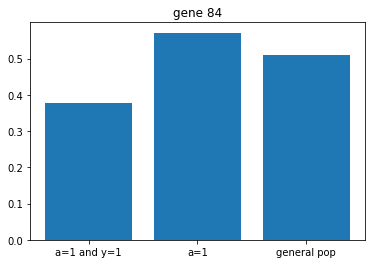

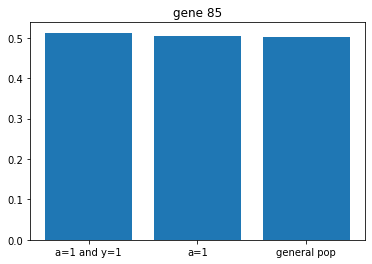

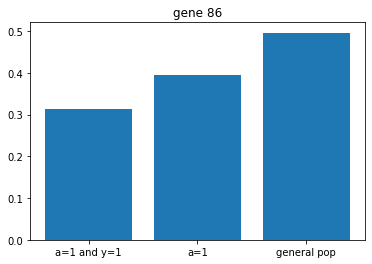

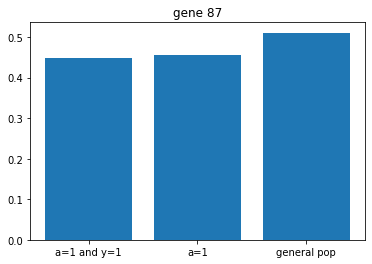

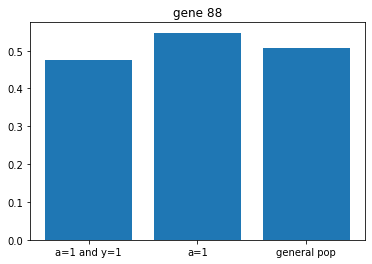

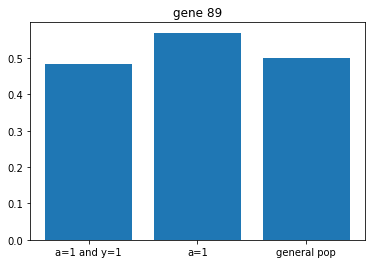

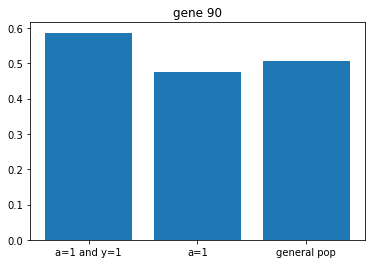

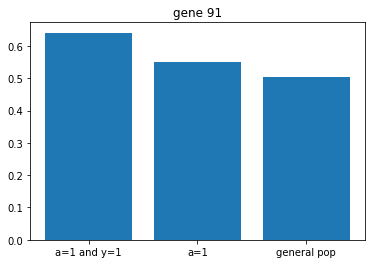

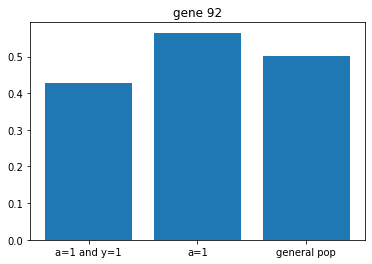

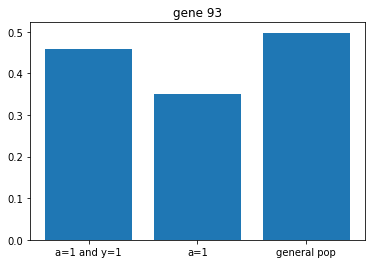

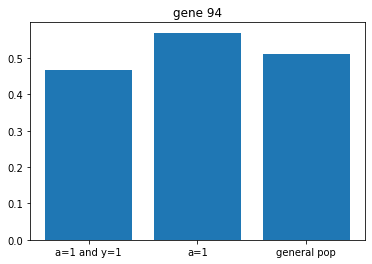

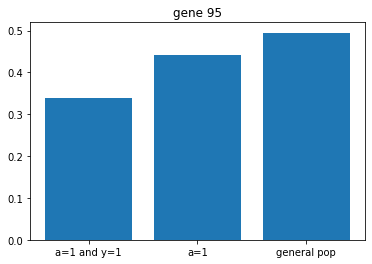

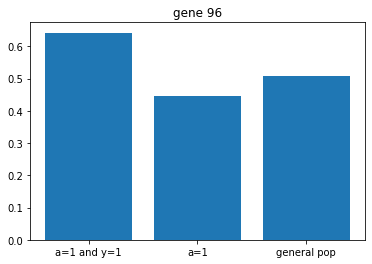

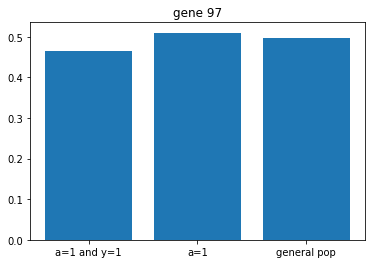

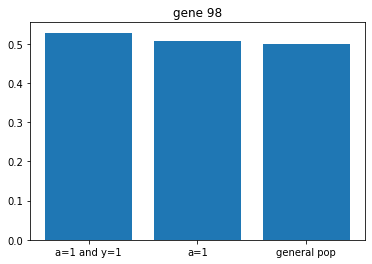

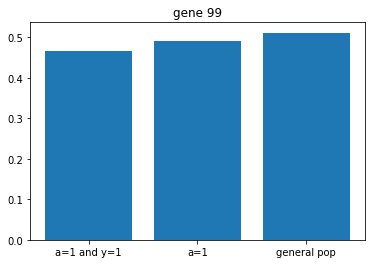

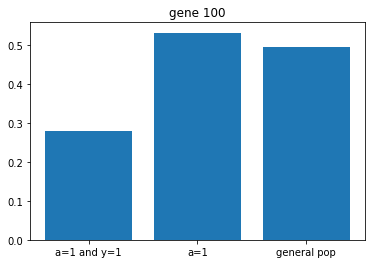

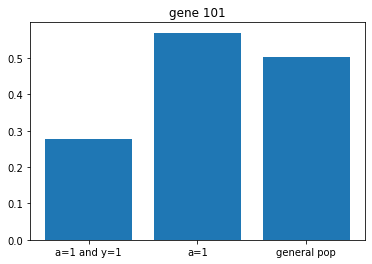

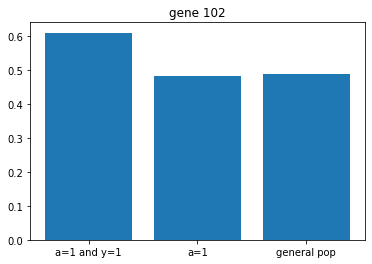

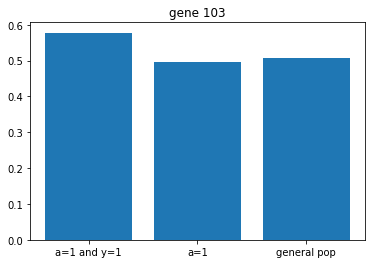

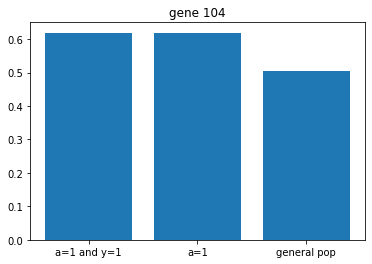

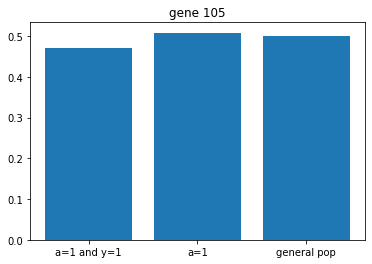

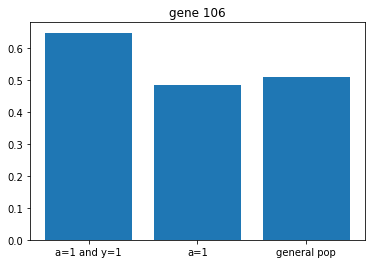

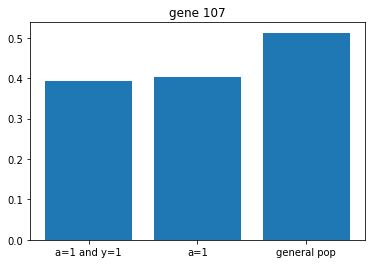

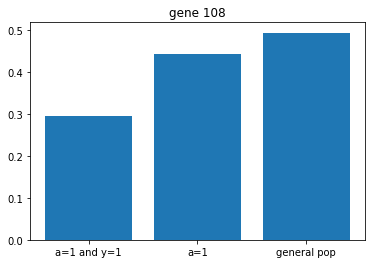

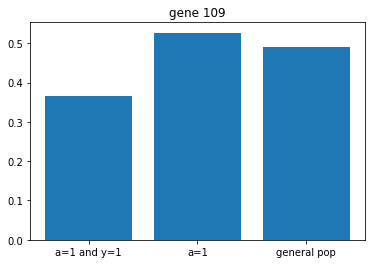

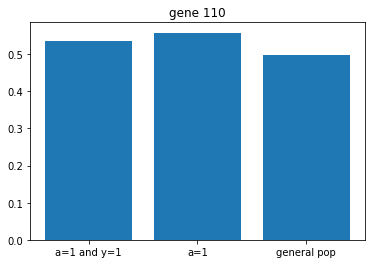

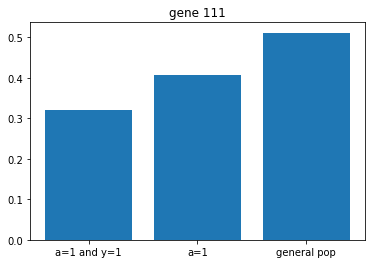

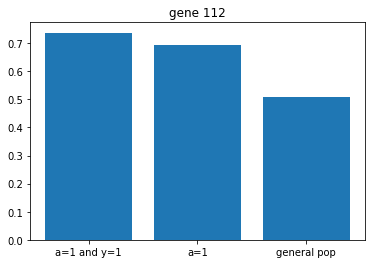

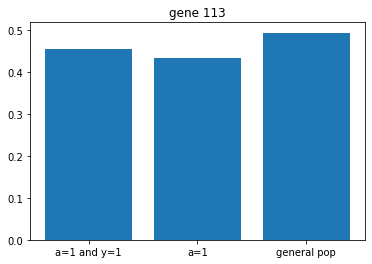

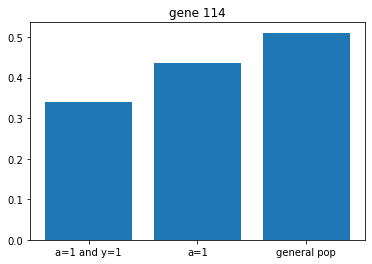

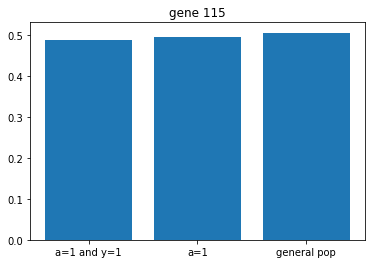

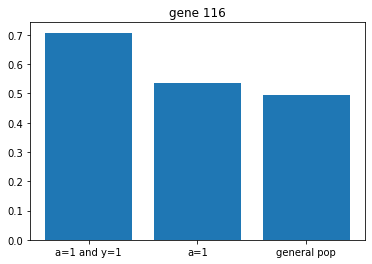

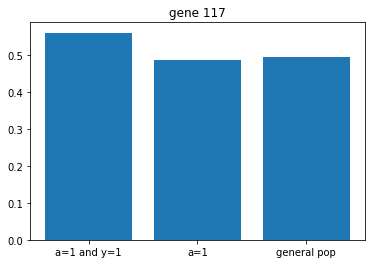

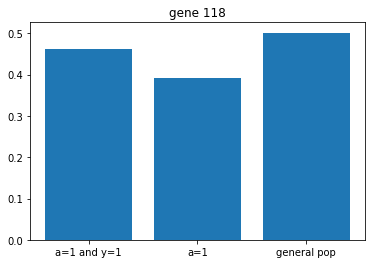

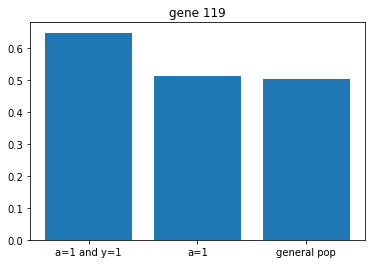

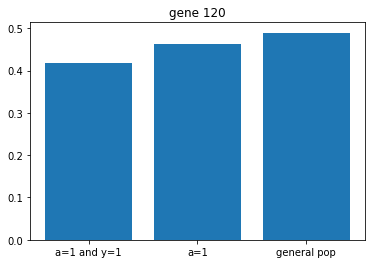

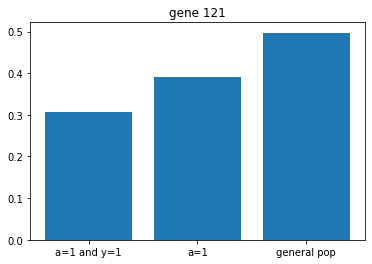

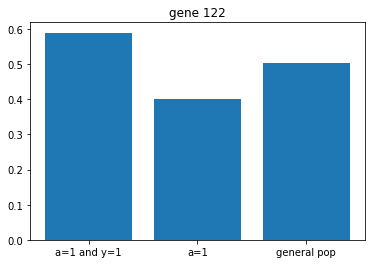

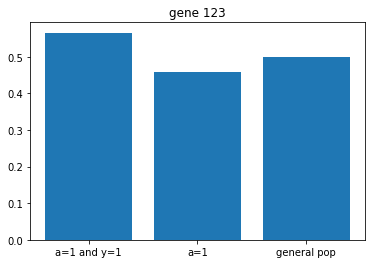

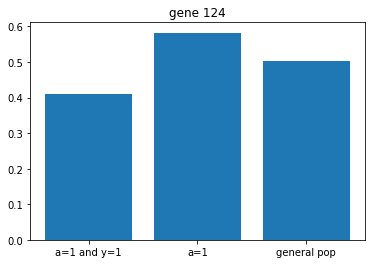

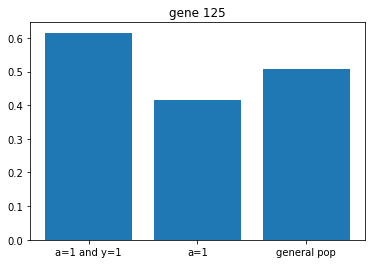

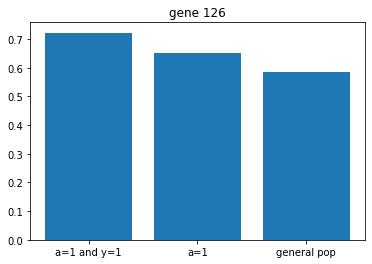

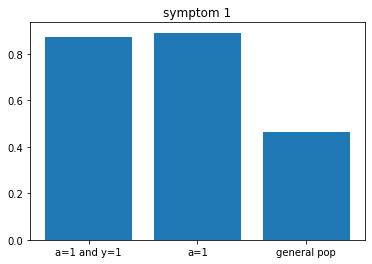

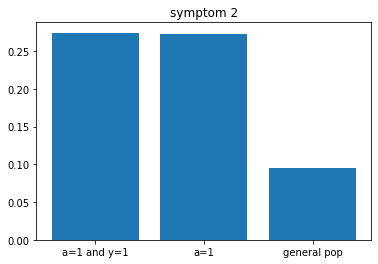

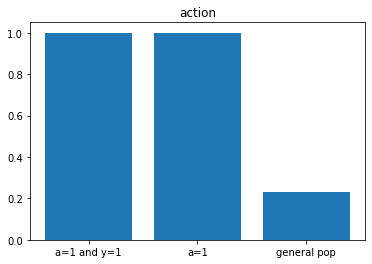

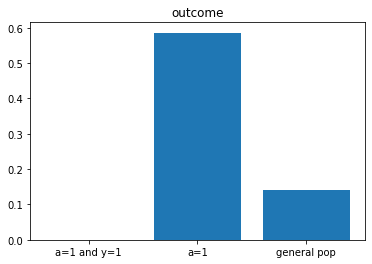

In [221]:
print(combo.sum(axis=0).apply(lambda x: x/len(combo)))
for ind in list(combo.sum(axis=0).apply(lambda x: x/len(combo)).index):
    presence_s2 = [combo.sum(axis=0).apply(lambda x: x/len(combo)).loc[ind],
    comb.loc[(comb["action"]==1)].sum(axis=0).apply(lambda x: x/len(comb.loc[(comb["action"]==1)])).loc[ind],
                 comb.sum(axis=0).apply(lambda x: x/len(comb)).loc[ind]]
    x_axis = ["a=1 and y=1", "a=1", "general pop"]
    plt.bar(x_axis, presence_s2)
    plt.title(ind)
    plt.show()

In [186]:
combo = comb.loc[(comb["action"]==1)&(comb["outcome"]==1)]

<BarContainer object of 132 artists>

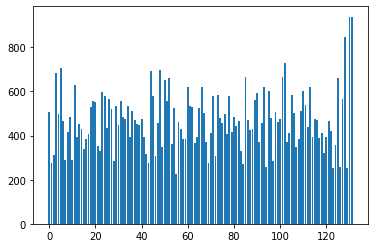

In [187]:
plt.bar(np.arange(132),combo.sum(axis=0))

In [196]:
combo.sum(axis=0).apply(lambda x: x/len(combo))[lambda x: x<0.3]

smoker       0.294995
gene 42      0.294995
gene 54      0.239617
gene 68      0.291800
gene 83      0.289670
gene 93      0.275825
gene 122     0.269436
gene 125     0.272630
symptom 2    0.271565
dtype: float64

We observe that there is an overrepresentation of some genes and an underrepresentation of others in the population $a=1\cap y=0$. We see little differences in the prevalence of the symptoms or the representation of sex or gender. These results imply that certain genes contribute to the fact that the intervention does not work, and so in cases where some or all of these genes are present, one should not give treatment as it will not work and treating a patient always has costs and risks attached to it. Keep in mind that this analysis does not take into account higher order interaction between genes, and should be taken with a pinch of salt.